## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

### 1 Define and describe a classification problem based on the dataset.

In [116]:
# data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


2 Implement any transformations chosen or justify the absence of such modifications.

In [117]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [118]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
# metadata 
print(chronic_kidney_disease.metadata) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [119]:
print(chronic_kidney_disease.variables)

     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                   so

In [120]:
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [121]:
X.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [122]:
y.head(5)

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd


The classification task involves identifying whether a patient is in the early stages of Chronic Kidney Disease (CKD) or is healthy, based on a range of medical measurements provided in the dataset. This entails categorizing individuals into two groups: those with early-stage CKD among the Indian population and those without CKD who are considered healthy.

### 2 Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [123]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

Categorical variables include sg, al, and su.
Integer variables include age, bp, bgr, bu, sod, pcv, and wbcc.
Binary variables are rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane, and class.
Continuous variables comprise sc, pot, hemo, and rbcc.
Our task involves transforming sg, al, and su into categorical variables and converting binary variables to numerical ones (0s and 1s). However, since there are missing values in the categorical variables, we'll handle them first before conversion.

In [124]:
columns_bin = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
mapping = {'normal': 1, 'present': 1, 'abnormal': 0, 'notpresent': 0, 'yes':1,'no':0,'good':1,'poor':0,'ckd':1,'notckd':0}

for column in columns_bin:
    df[column] = df[column].map(mapping).astype(float)
    
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 3  Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [125]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000,398.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.794486,0.190476,0.150376,0.623116
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475997,0.279868,0.404584,0.393170,0.357888,0.485216
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
print(df.shape)
df.dtypes

(400, 25)


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

<Figure size 2000x1500 with 0 Axes>

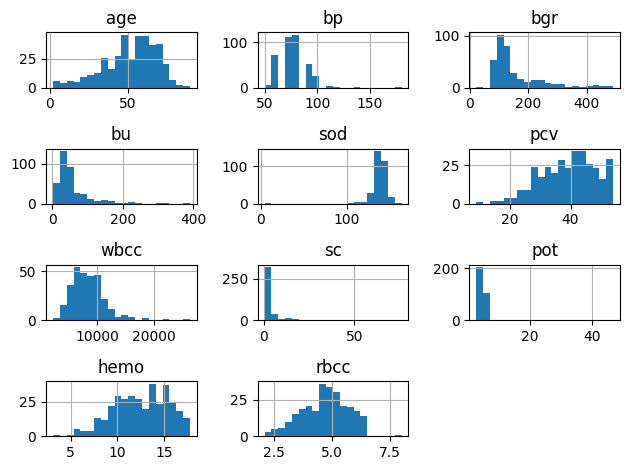

In [127]:
import matplotlib.pyplot as plt

# Define the list of numerical columns
num_col = ['age', 'bp', 'bgr', 'bu', 'sod', 'pcv', 'wbcc', 'sc', 'pot', 'hemo', 'rbcc']

# Create histograms for numerical columns with larger figures
plt.figure(figsize=(20, 15))
df[num_col].hist(bins=20)
plt.tight_layout()
plt.show()



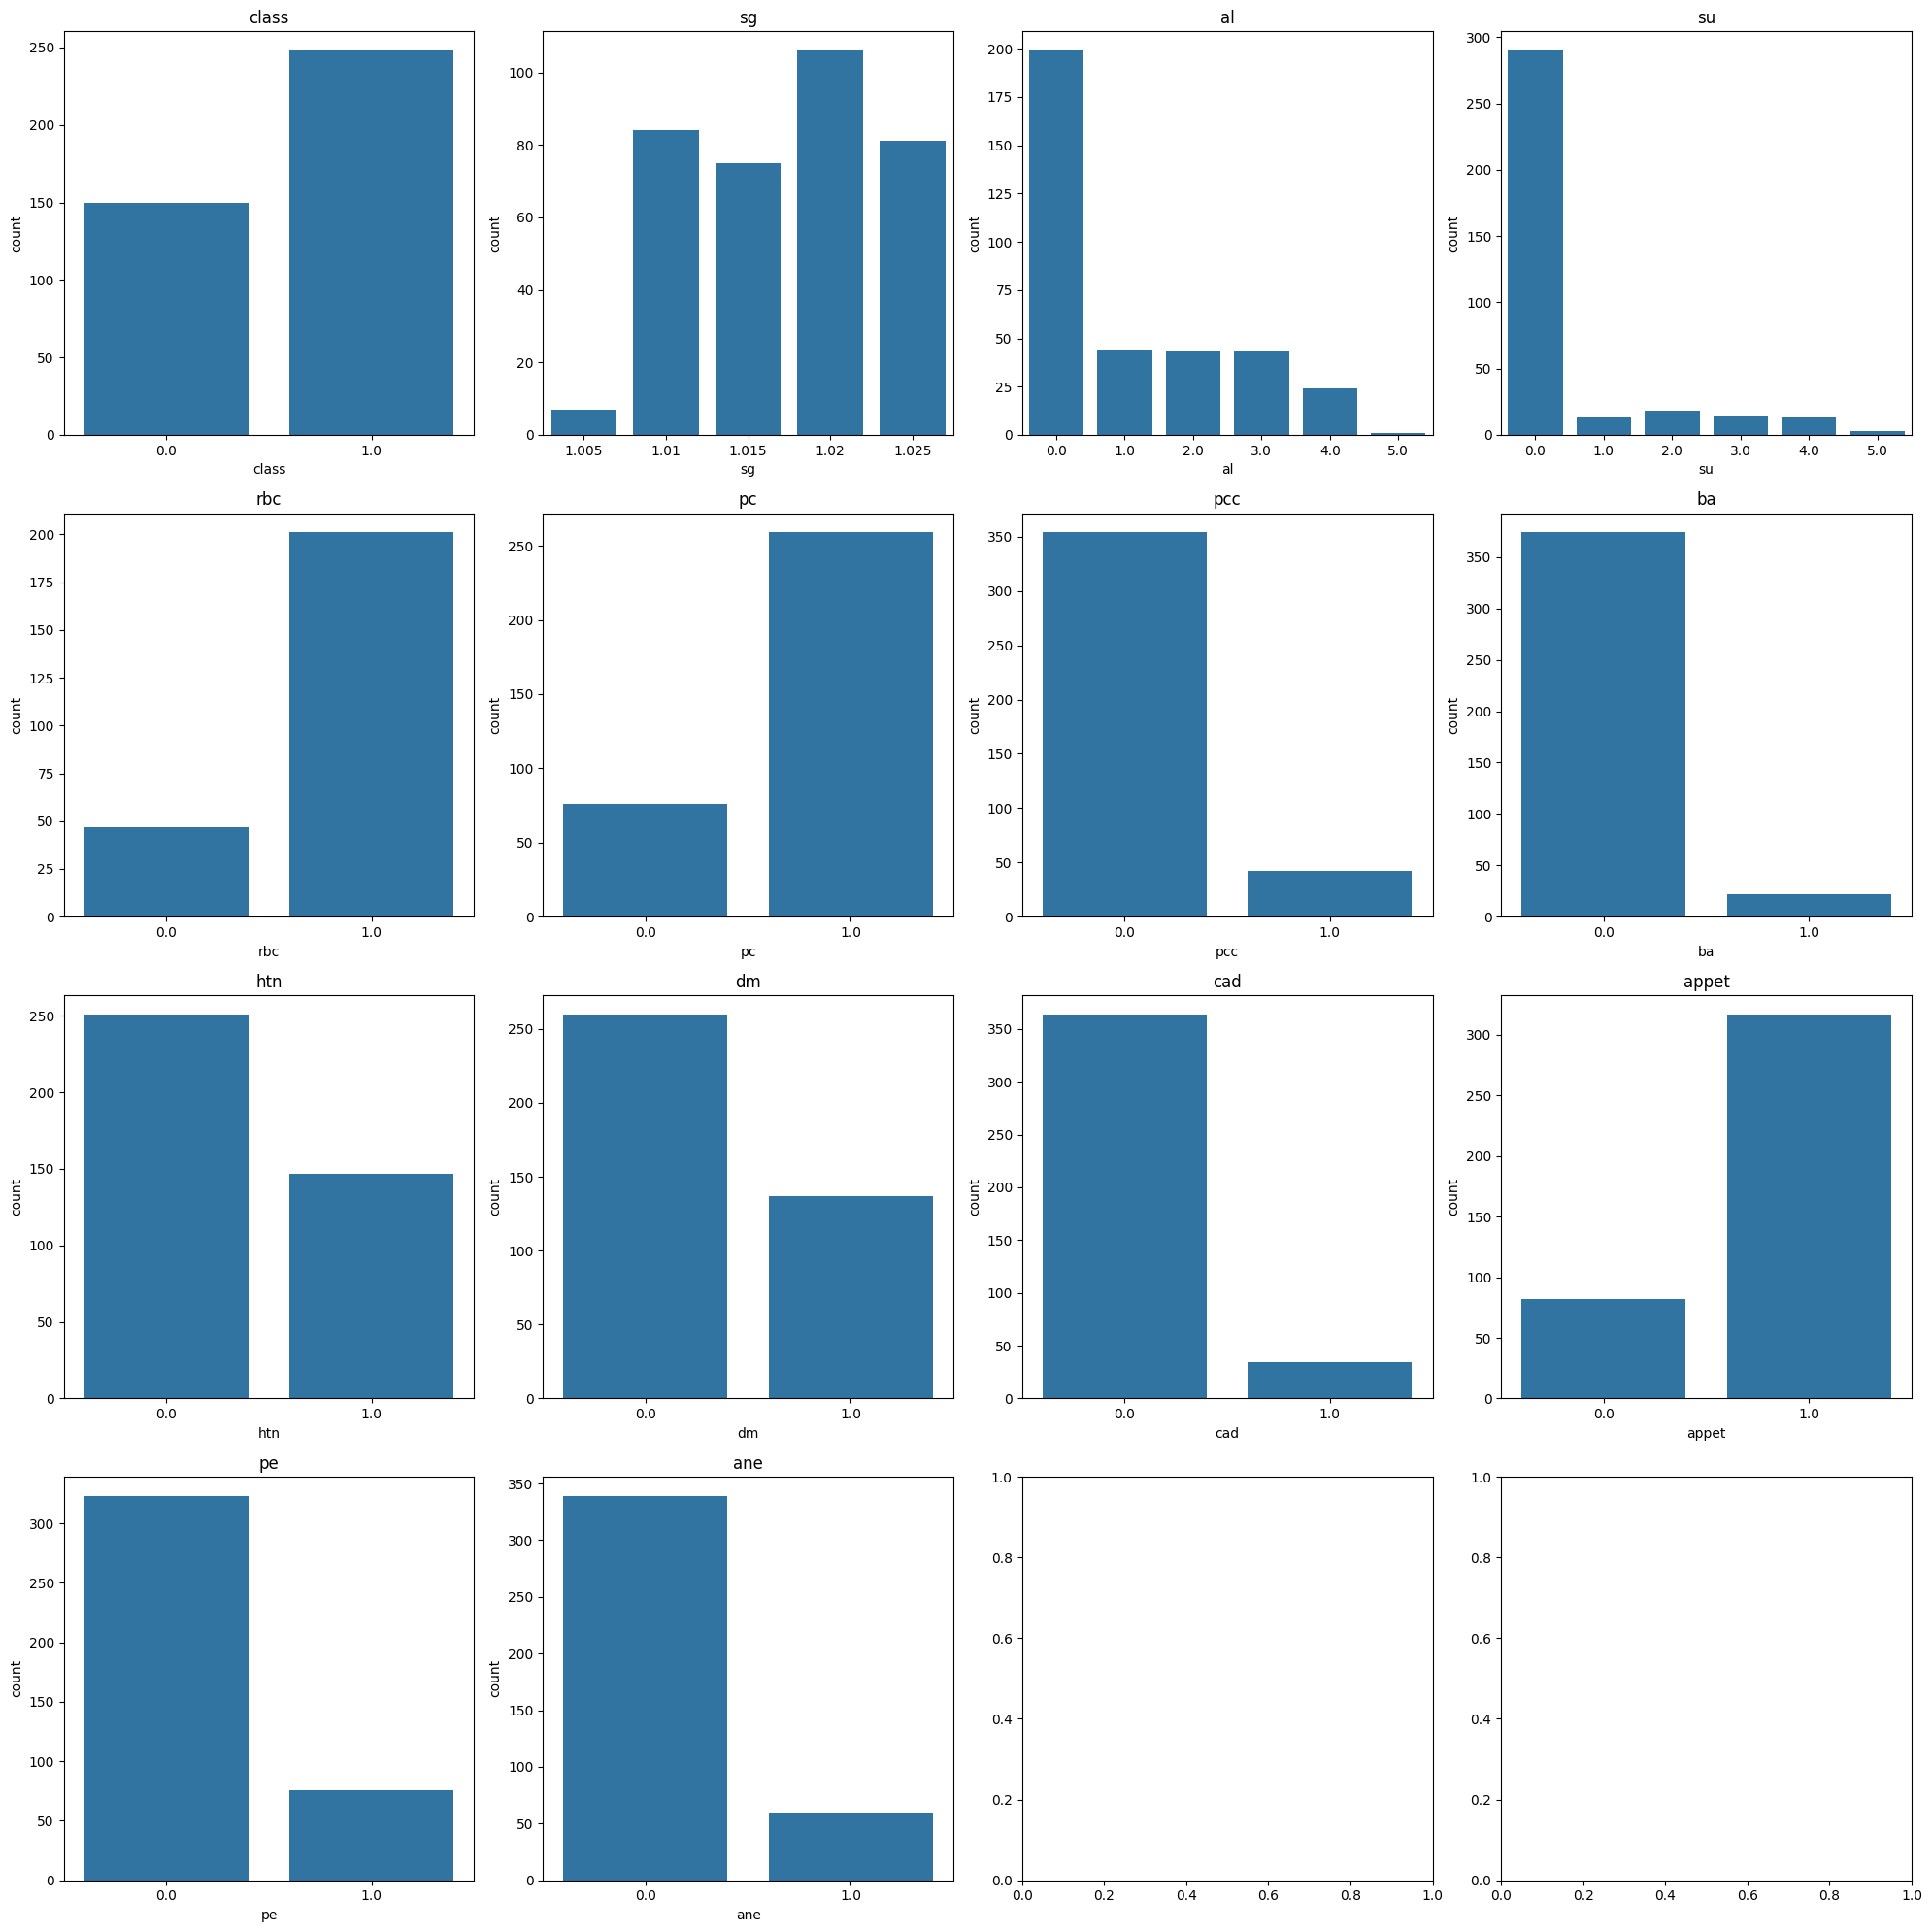

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of categorical columns
columns_cat = ['class', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Define the number of rows and columns for subplots
rows = 4
cols = 4

# Create a figure and axes with specified size
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Iterate through each categorical column and plot countplot
for i, column in enumerate(columns_cat):
    row = i // cols
    col = i % cols
    sns.countplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


The dataset consists of 400 observations and 25 variables. Among these variables, sg, al, and su have been transformed into categorical variables, while age, bp, bgr, bu, sod, pcv, wbcc, sc, pot, hemo, and rbcc are float type variables. The remaining variables are of type object, indicating binary categories.

From the summary statistics, we observe that the mean age of the patients is approximately 51.48, with the minimum and maximum ages being 2 and 90, respectively. The mean blood pressure (bp) is around 76.47.

However, the summary statistics also suggest the presence of missing values and outliers in the dataset. This is evident from the skewness observed in the distribution of observations across each variable. Addressing this issue may involve replacing missing values, potentially with the median depending on the distribution of each variable.

### 4 Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

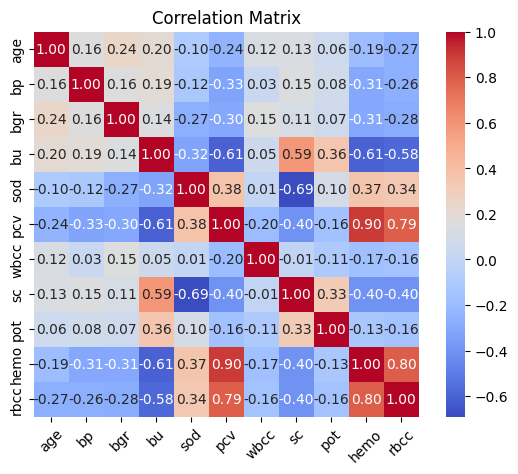

In [129]:
# Define the numerical columns
num_col = ['age', 'bp', 'bgr', 'bu', 'sod', 'pcv', 'wbcc', 'sc', 'pot', 'hemo', 'rbcc']

# Compute the correlation matrix
correlation_matrix = df[num_col].corr()

# Plot the correlation matrix
plt.figure(figsize=(7, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(ticks=range(len(num_col)), labels=num_col, rotation=45)
plt.yticks(ticks=range(len(num_col)), labels=num_col)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Serum Creatinine and Hemoglobin (sc and hemo): When serum creatinine levels increase, hemoglobin levels tend to decrease significantly, indicating a strong negative correlation (-0.61). This relationship suggests that there is an inverse association between serum creatinine and hemoglobin concentrations.

Packed Cell Volume and Hemoglobin (pcv and hemo): There is a robust positive correlation (0.90) between packed cell volume (pcv) and hemoglobin (hemo). This implies that as the packed cell volume increases, hemoglobin levels also increase notably. The strong positive correlation suggests a direct relationship, likely due to both factors being indicators of the blood's oxygen-carrying capacity.

Sodium, Blood Urea, and Serum Creatinine (sod, bu, and sc): Sodium levels (sod) exhibit a moderate negative correlation with both blood urea (bu) and serum creatinine (sc). This suggests that elevated levels of urea and creatinine in the blood are associated with lower sodium levels.

### 5 Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [130]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      2
dtype: int64

In [131]:
print(df.shape)

df_dropna = df.dropna()
print(df_dropna.shape)

(400, 25)
(158, 25)


Considering the distribution of observed values for each variable in the dataset overview, we have identified the appropriate methods for handling missing values. Specifically, for variables such as age, pcv, and rbcc, where the distribution closely resembles a normal distribution, missing values will be replaced with the mean. However, in cases where there is skewness in the distribution, such as for the remaining variables, missing observations will be replaced with the median. This strategy aims to maintain the integrity of the data while ensuring consistency in handling missing values across different variables.

In [132]:
median_col = ['age', 'pcv', 'rbcc', 'bp', 'bgr', 'bu', 'sod', 'wbcc', 'sc', 'pot', 'hemo']
columns_bin = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
columns_cat = ['sg', 'al', 'su']

# Fill missing values in numerical columns with median
df[median_col] = df[median_col].fillna(df[median_col].median())

# Fill missing values in binary and categorical columns with mode
for column in columns_bin + columns_cat:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [133]:
columns_cat = [ 'class','sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in columns_cat:
    df[col] = pd.Categorical(df[col])

df.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object

In [134]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,1.0,1.0,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,36.0,8000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,80.0,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [135]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

### 6 **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

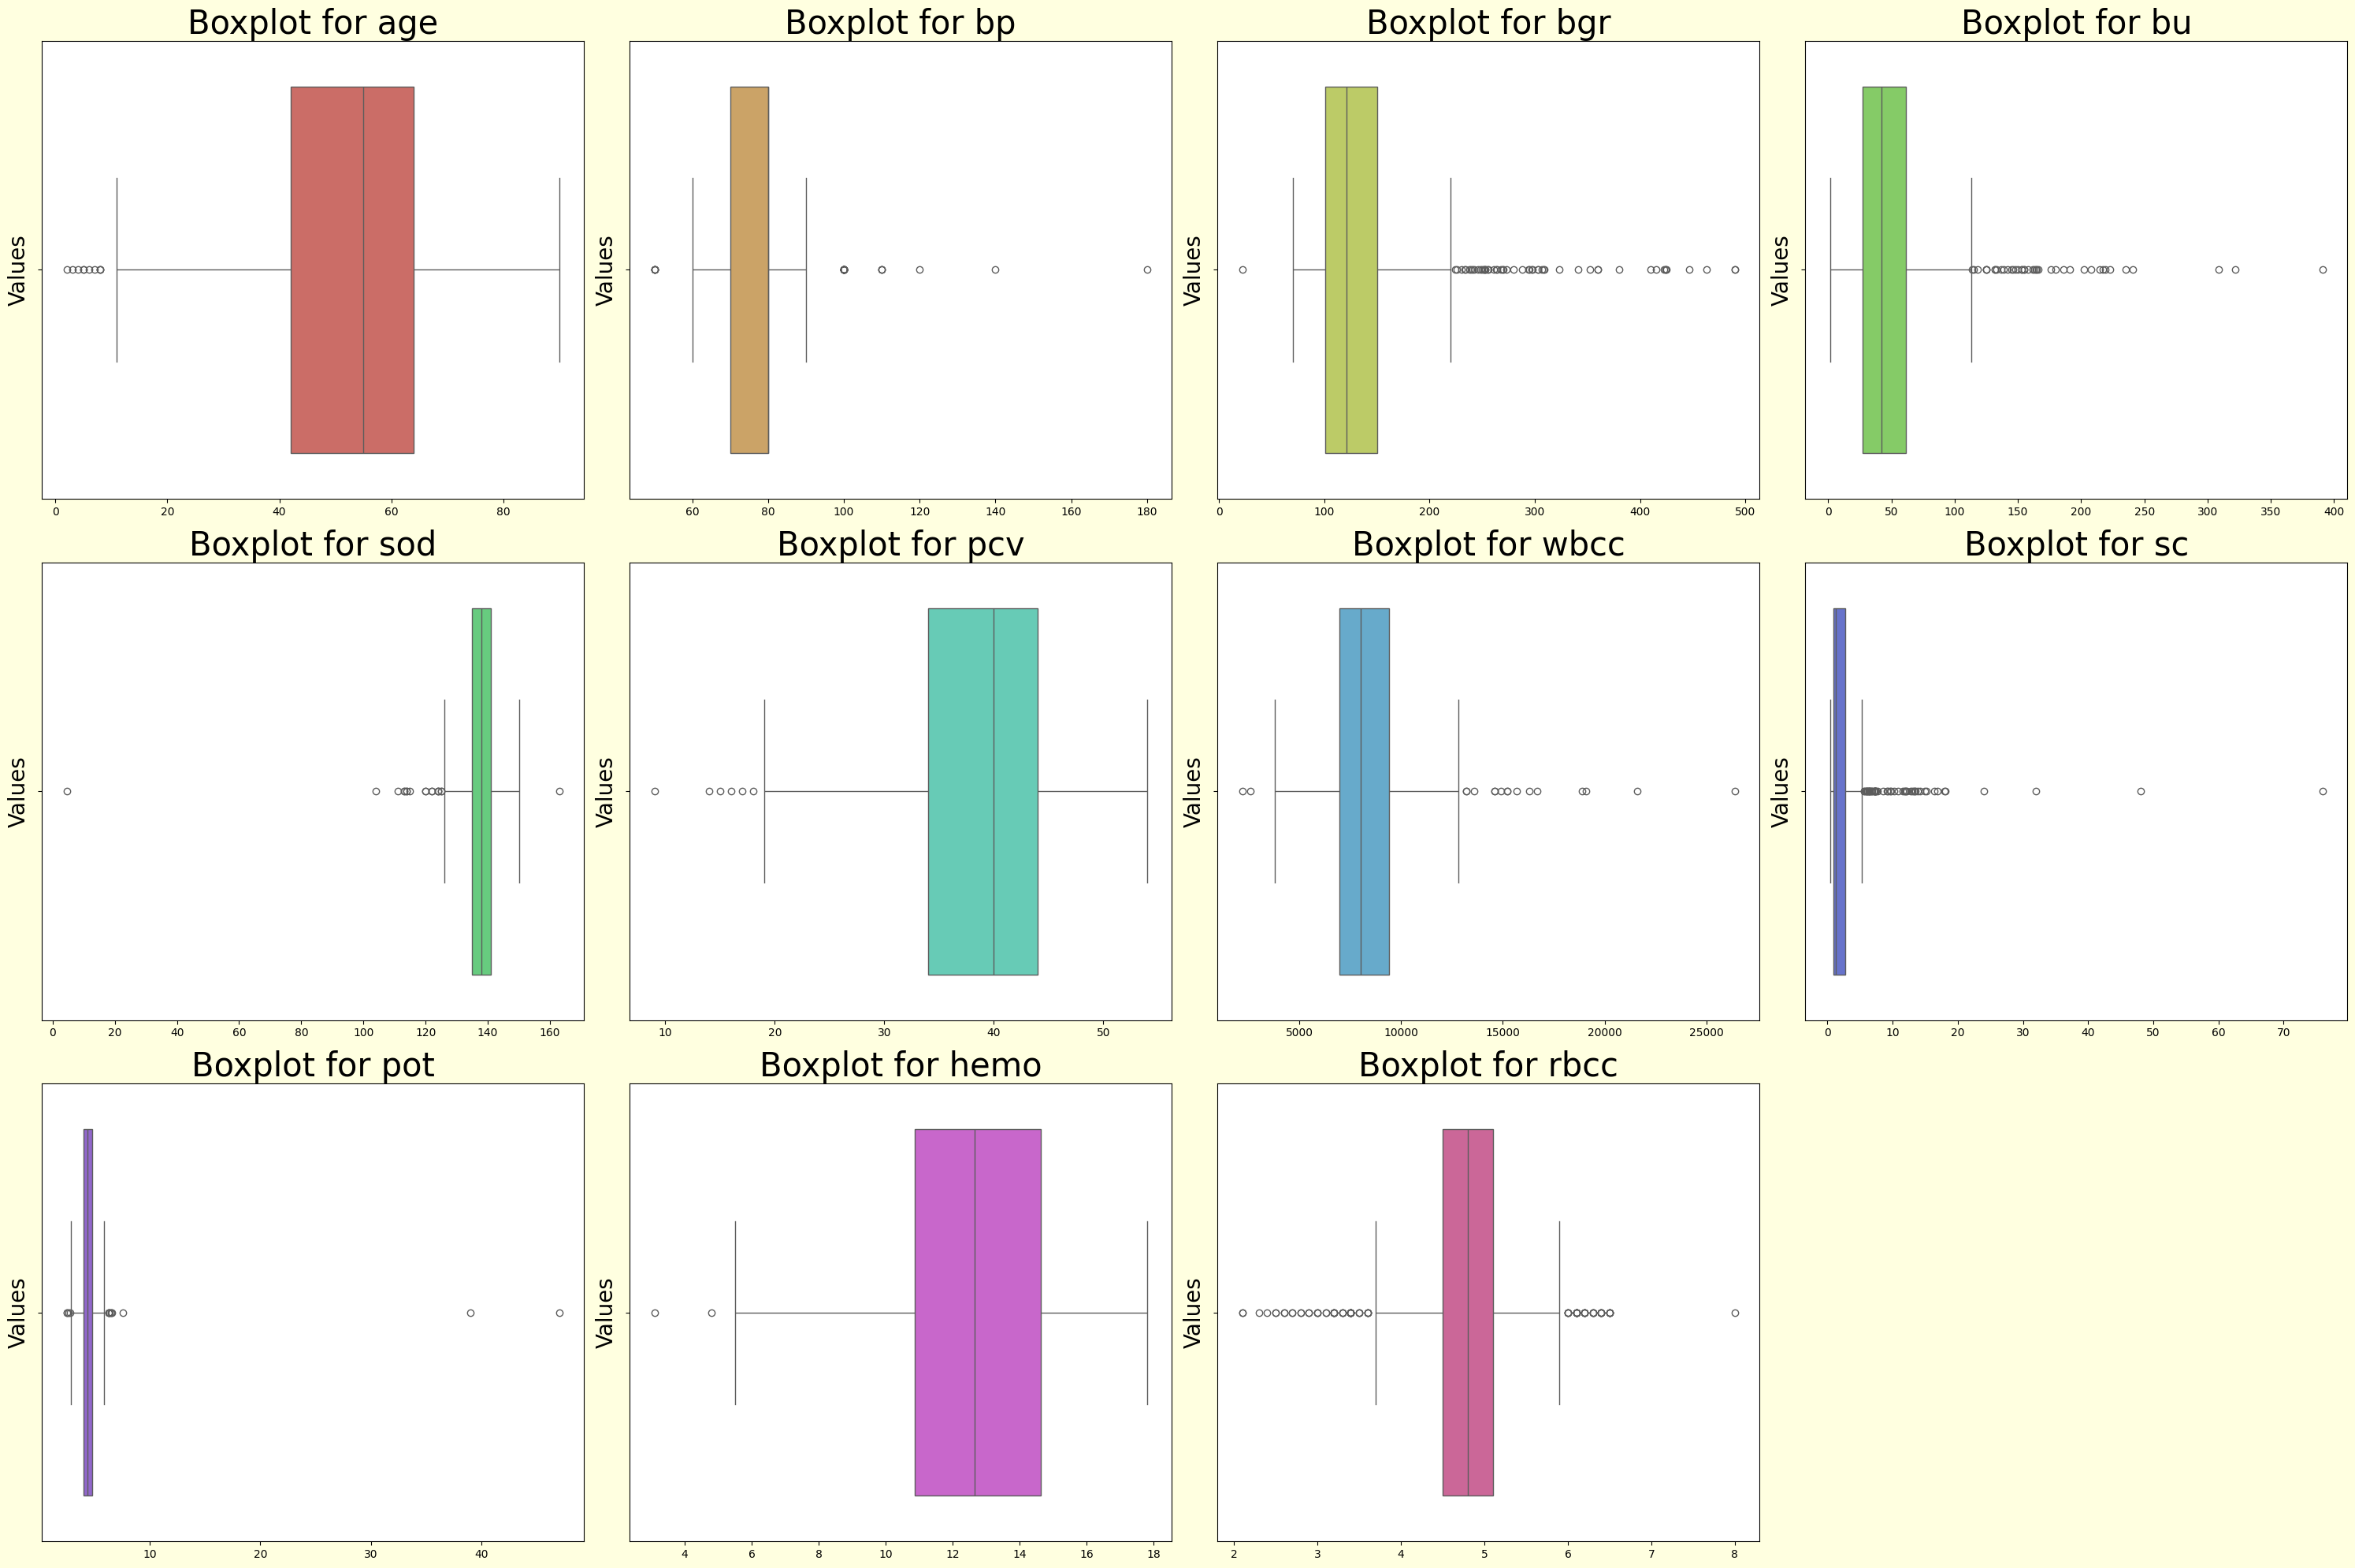

In [136]:
# Define the number of rows and columns for subplots
n_rows, n_cols = (3, 4)

# Define color palette
colors = sns.color_palette("hls", len(df[num_col].columns))

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 20), facecolor='lightyellow')

# Flatten axes for easy iteration
axes_flat = axes.flatten()

# Iterate over numerical columns and create boxplots
for i, column in enumerate(df[num_col].columns):
    # Create boxplot
    sns.boxplot(x=df[column], ax=axes_flat[i], color=colors[i])
    
    # Set title and labels
    axes_flat[i].set_title(f'Boxplot for {column}', fontsize=30)
    axes_flat[i].set_ylabel("Values", fontsize=20)

    # Hide x-axis label for better readability
    axes_flat[i].set_xlabel('')
    
# Hide unused subplots
for ax in axes_flat[len(df[num_col].columns):]:
    ax.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [137]:

for column in df[num_col].columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Max val
    max_val = df[column].max()
    # .95
    np.quantile(df[column], 0.95)
    # outlier threshold
    threshold_max = Q3 + 1.5 * (Q3 - Q1)
    threshold_min = Q1 - 1.5 * (Q3 - Q1)

    df[column] = np.where(df[column] > threshold_max, threshold_max, df[column])
    df[column] = np.where(df[column] < threshold_min, threshold_min, df[column])


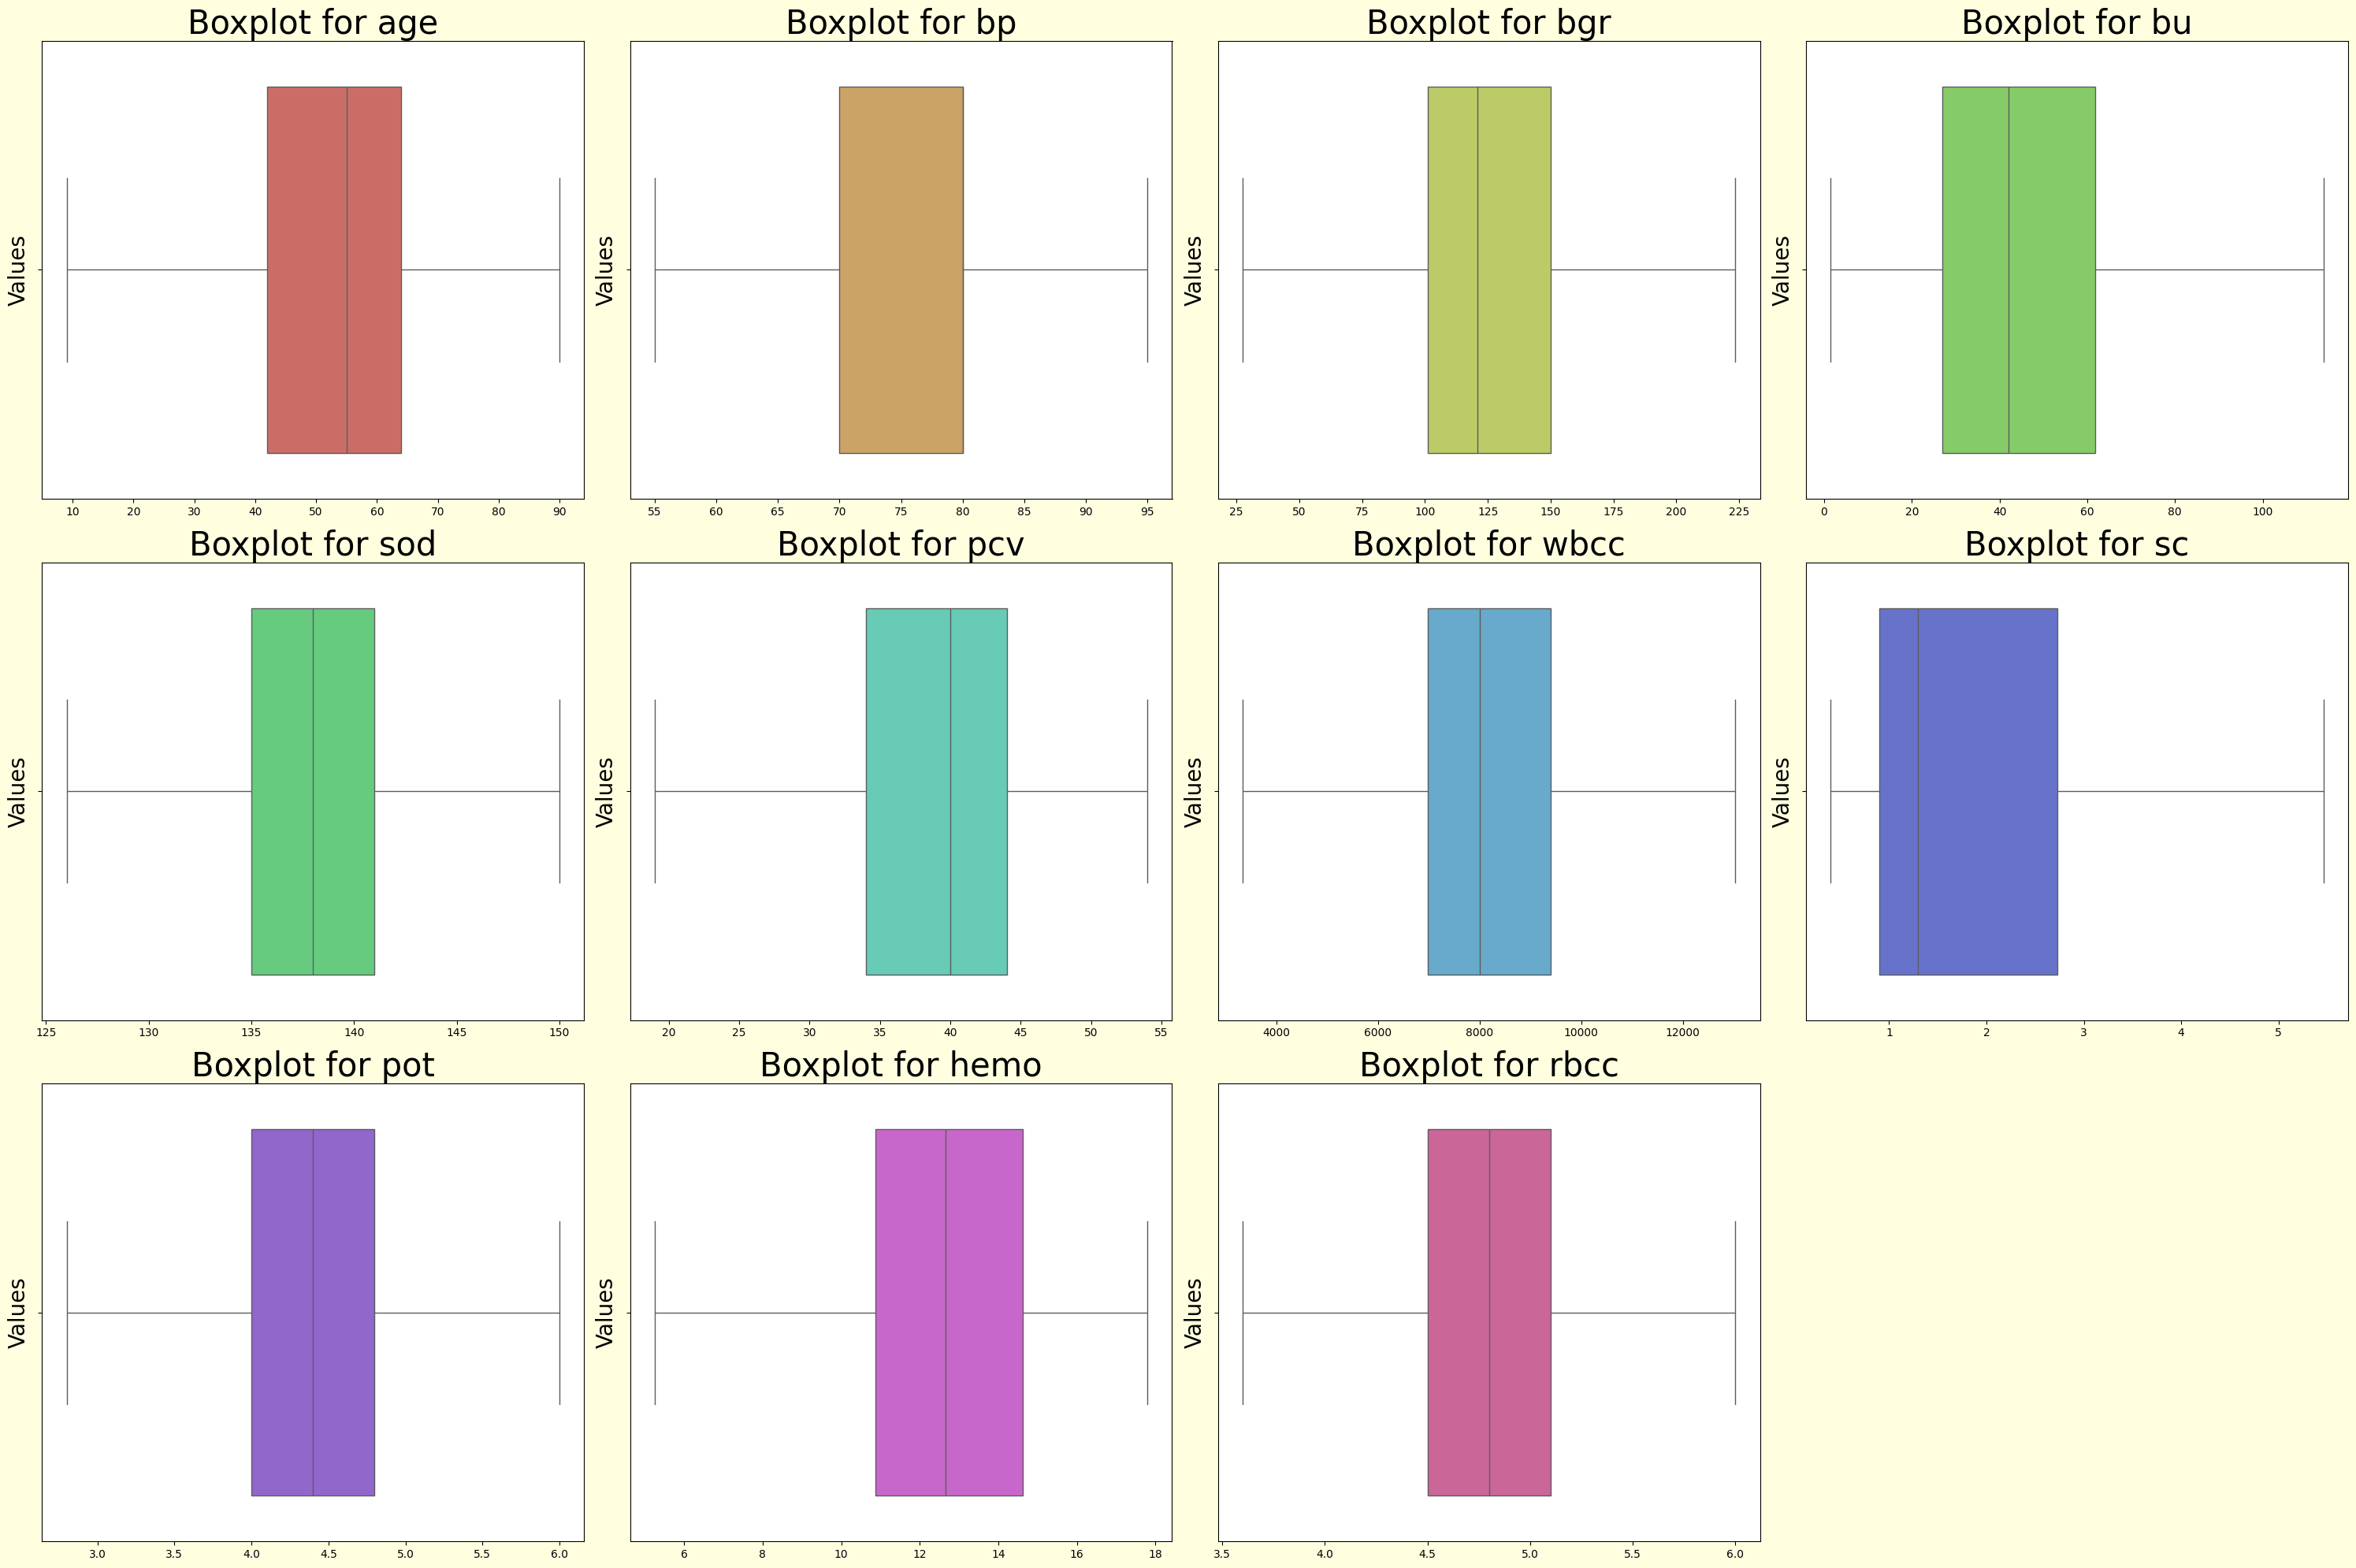

In [138]:
# Define the number of rows and columns for subplots
n_rows, n_cols = (3, 4)

# Define color palette
colors = sns.color_palette("hls", len(df[num_col].columns))

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 20), facecolor='lightyellow')

# Flatten axes for easy iteration
axes_flat = axes.flatten()

# Iterate over numerical columns and create boxplots
for i, column in enumerate(df[num_col].columns):
    # Create boxplot
    sns.boxplot(x=df[column], ax=axes_flat[i], color=colors[i])
    
    # Set title and labels
    axes_flat[i].set_title(f'Boxplot for {column}', fontsize=30)
    axes_flat[i].set_ylabel("Values", fontsize=20)

    # Hide x-axis label for better readability
    axes_flat[i].set_xlabel('')
    
# Hide unused subplots
for ax in axes_flat[len(df[num_col].columns):]:
    ax.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### 7 **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [139]:
df[num_col].mean()

age       51.647500
bp        75.825000
bgr      134.011250
bu        50.277687
sod      138.217500
pcv       39.145000
wbcc    8169.093750
sc         2.071406
pot        4.382750
hemo      12.549000
rbcc       4.769750
dtype: float64

In [140]:
df[num_col].var()

age     2.807652e+02
bp      1.203703e+02
bgr     2.124512e+03
bu      9.171178e+02
sod     2.780972e+01
pcv     6.371326e+01
wbcc    4.123827e+06
sc      2.659236e+00
pot     4.035864e-01
hemo    7.272142e+00
rbcc    4.553984e-01
dtype: float64

In unsupervised learning, variables with larger variances exert a more significant influence on the algorithm's outcomes compared to those with smaller variances. Hence, it's crucial to standardize or scale all variables to ensure they contribute equally to the analysis, regardless of their original scale or variance. This scaling process helps prevent features with larger variances from dominating the algorithm and ensures a fair comparison of their contributions to the overall analysis.

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(
    df[num_col]
)
print(df[num_col].head(5))

        age        bp       bgr        bu       sod       pcv      wbcc  \
0 -0.217955  0.381013 -0.282640 -0.472051 -0.041296  0.609001 -0.181983   
1 -2.548388 -1.900504 -0.282640 -1.067169 -0.041296 -0.143626 -1.069478   
2  0.618610  0.381013  1.943938  0.090005 -0.041296 -1.021691 -0.329898   
3 -0.217955 -0.531594 -0.369530  0.189192 -2.319677 -0.896254 -0.724341   
4 -0.038691  0.381013 -0.608480 -0.802672 -0.041296 -0.519940 -0.428509   

         sc       pot      hemo      rbcc  
0 -0.535039  0.027187  1.058546  0.638364  
1 -0.780638  0.027187 -0.463740  0.044882  
2 -0.166642  0.027187 -1.094932  0.044882  
3  1.061349 -2.494524 -0.500869 -1.290453  
4 -0.412240  0.027187 -0.352353 -0.251859  


K-means clustering is a valuable tool for conducting subgroup analysis within a dataset. It allows us to group data points into distinct clusters based on similarity, thereby revealing underlying patterns or structures within the data. This method enables us to identify subgroups or clusters of data points that share similar characteristics or behavior, facilitating deeper insights and targeted analysis within the dataset.

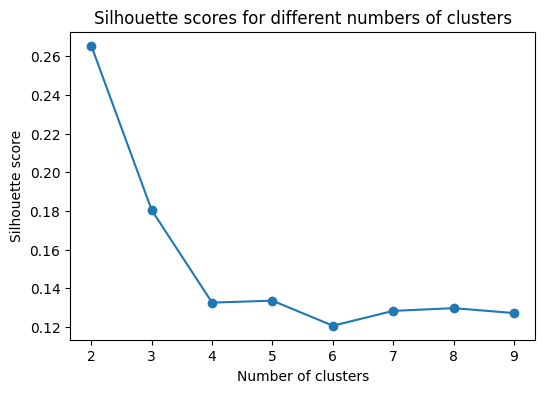

In [142]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

# Specify columns to drop
columns_to_drop = ['class', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Create a new DataFrame without the specified columns
df_test = df.drop(columns=columns_to_drop)


# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Define range of cluster numbers
K_range = range(2, 10)

# Iterate over the range of cluster numbers
for K in K_range:
    # Initialize KMeans with the current number of clusters
    km = KMeans(n_clusters=K, n_init=20, random_state=1)
    
    # Fit the model and predict clusters
    clusters = km.fit_predict(df_test)
    
    # Calculate silhouette score and append to list
    silhouette_scores.append(silhouette_score(df_test, clusters))

# Plot silhouette scores against number of clusters
plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


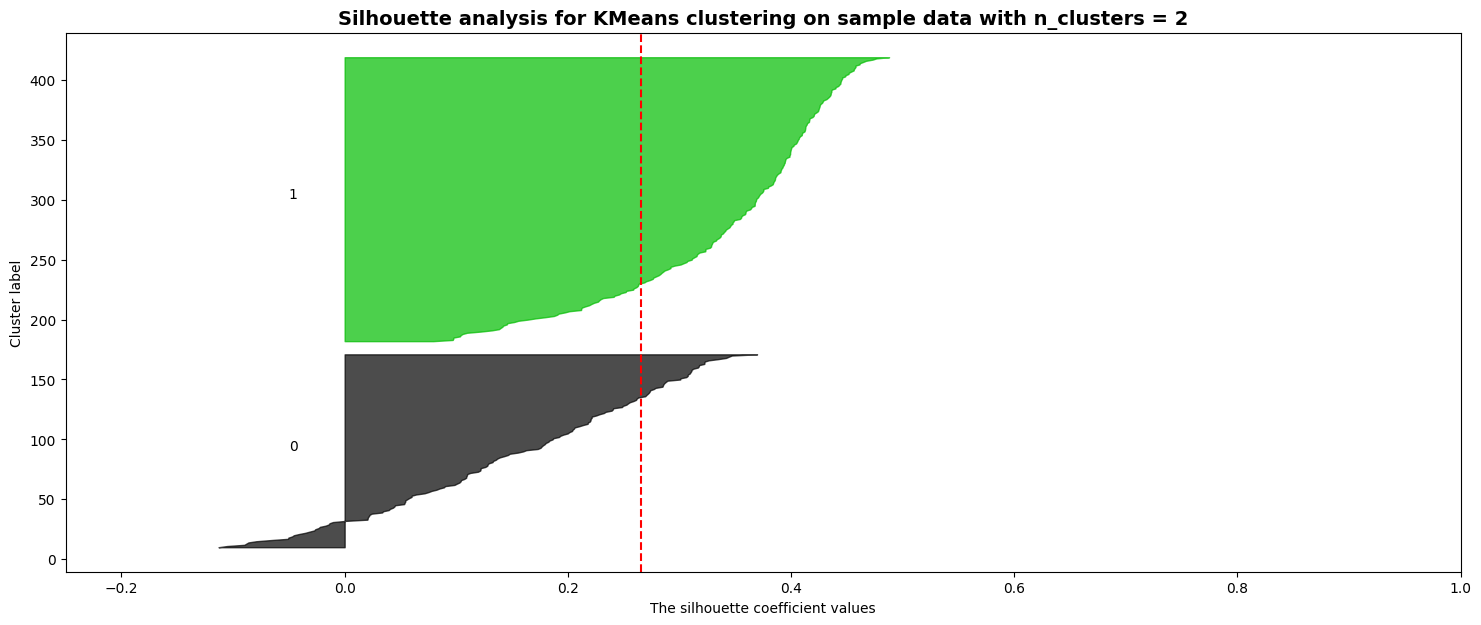

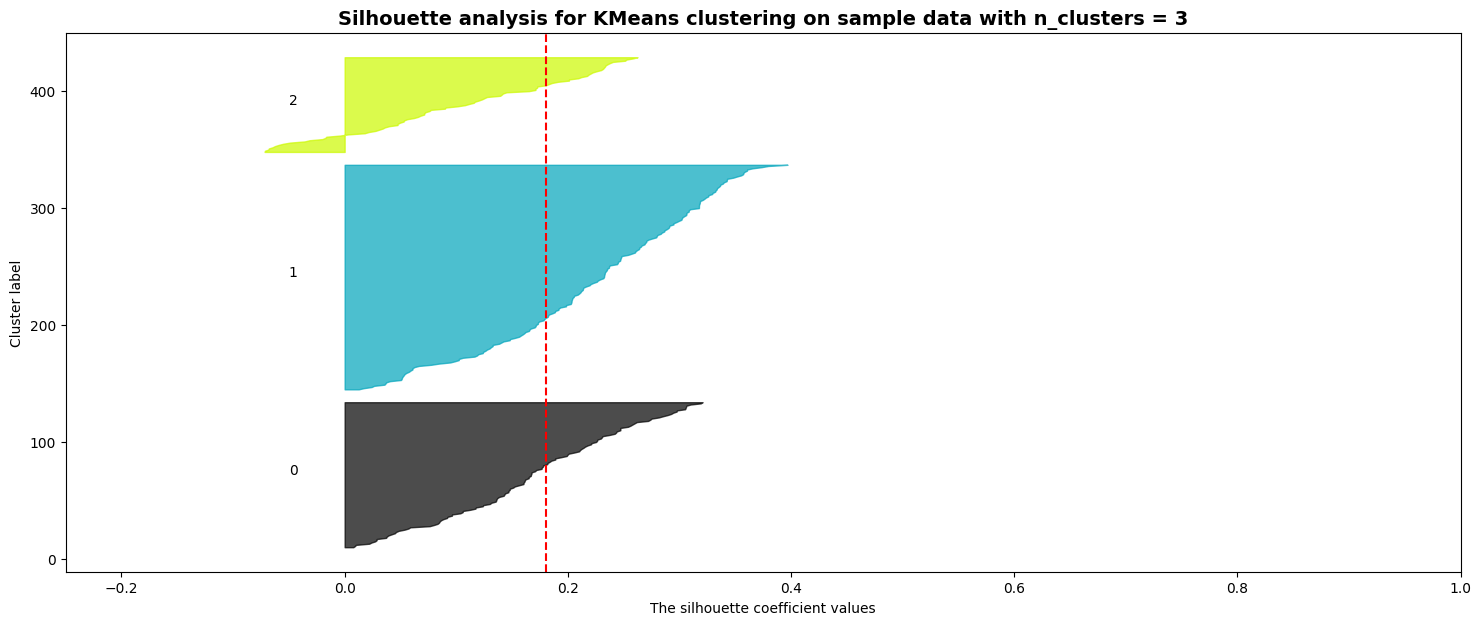

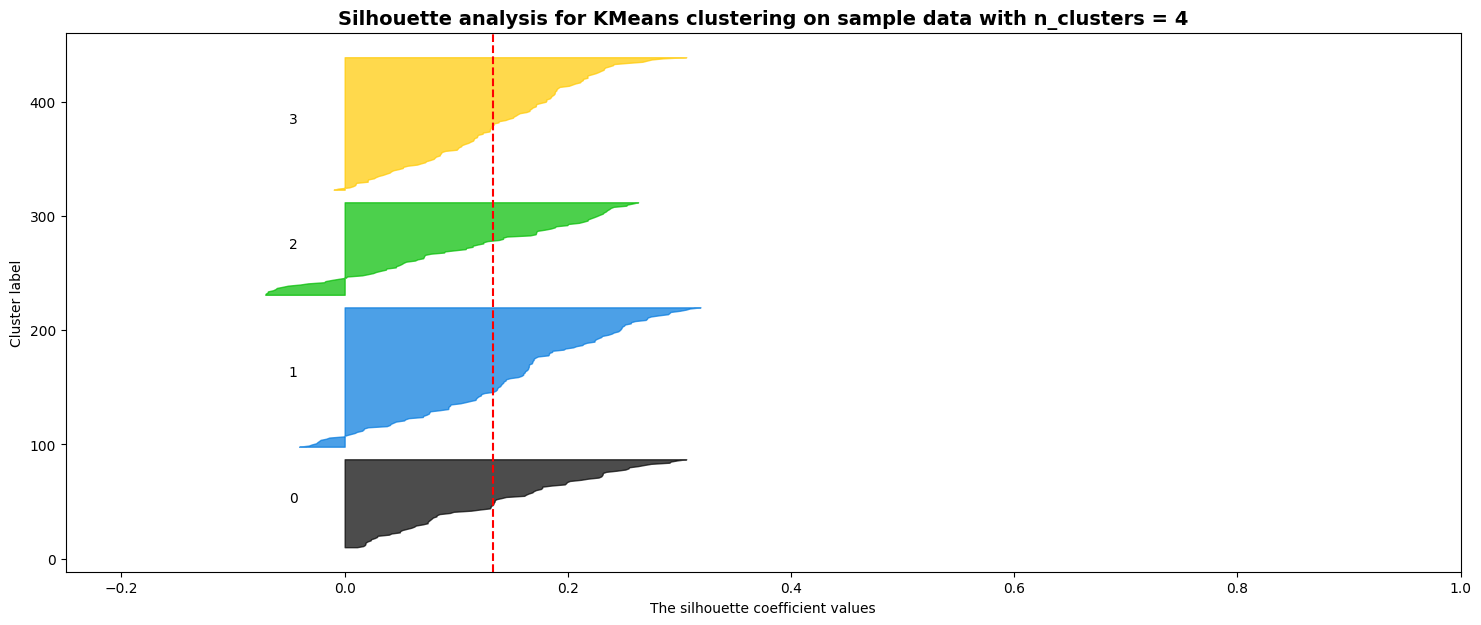

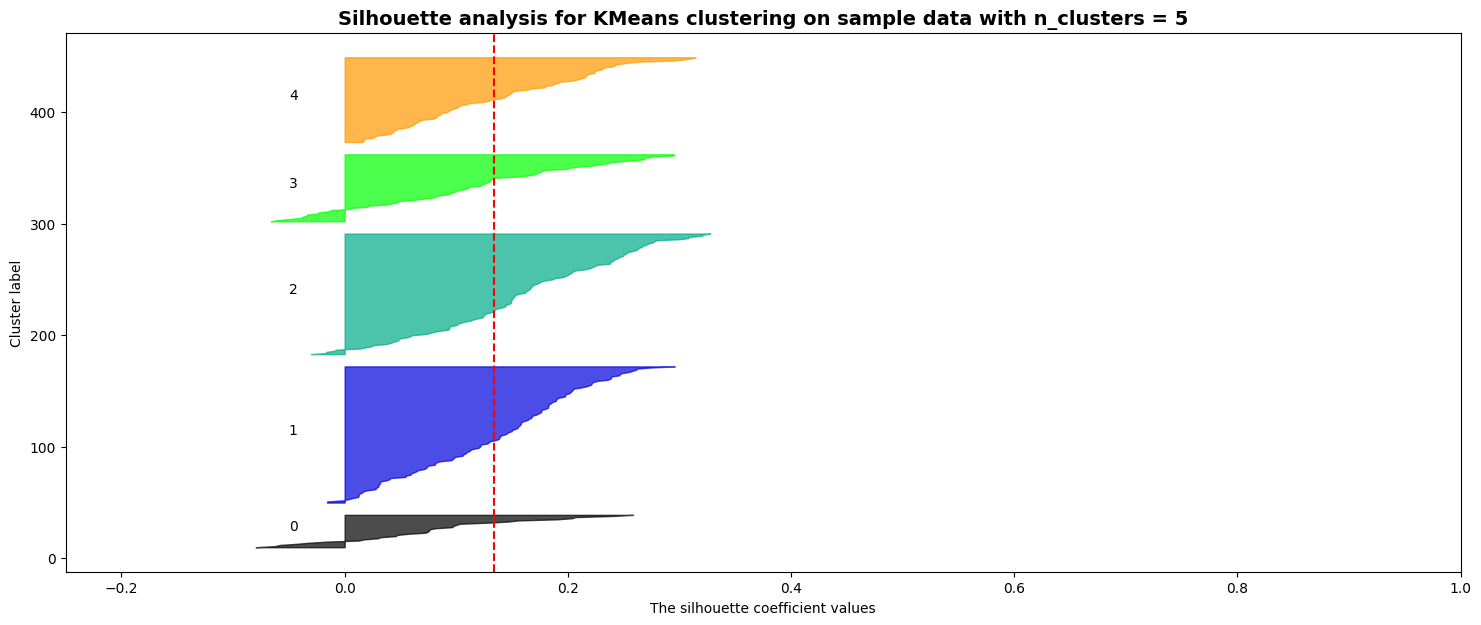

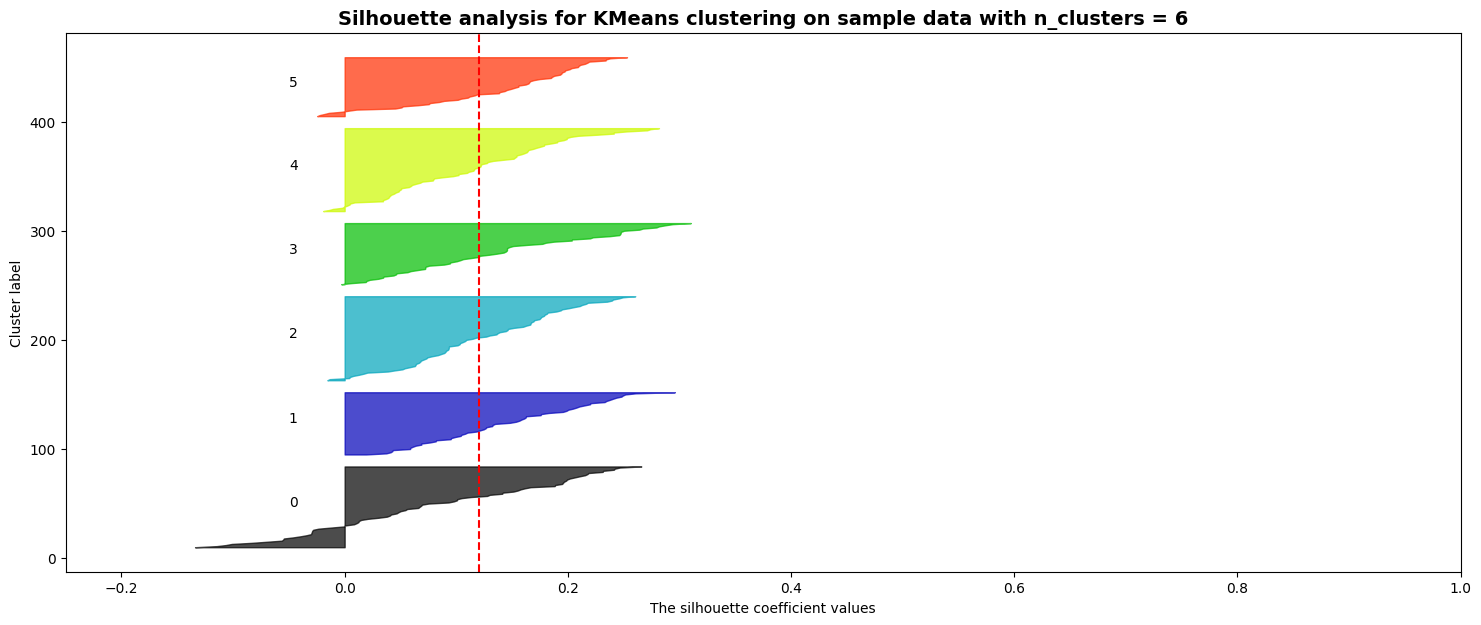

In [143]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=1)
    
    # Predict cluster labels
    cluster_labels_km = km.fit_predict(df_test)
    
    # Compute the silhouette score
    silhouette_avg_km = silhouette_score(df_test, cluster_labels_km)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_test, cluster_labels_km)
    
    # Create subplot
    plt.figure(figsize=(18, 7))
    ax1 = plt.gca()
    ax1.set_xlim([-0.25, 1])  # adjust this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Generate color for the cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        # Fill silhouette plot with cluster color
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Add vertical line for average silhouette score
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.show()


The presence of negative silhouette scores indicates that certain samples are likely assigned to incorrect clusters. Moreover, the consistently low silhouette scores imply that the data may have excessively high dimensions. To address this issue, employing Principal Component Analysis (PCA) to reduce the dimensionality of the data seems prudent. It's worth noting that in this process, we must exclude both the response variable and any categorical variables. Consequently, these variables will need to be dropped from the dataset prior to PCA transformation. This approach aims to enhance clustering performance by reducing the complexity of the data while retaining its essential features.

In [144]:
df[num_col].var()

age     1.002506
bp      1.002506
bgr     1.002506
bu      1.002506
sod     1.002506
pcv     1.002506
wbcc    1.002506
sc      1.002506
pot     1.002506
hemo    1.002506
rbcc    1.002506
dtype: float64

Since the variance of all variables is approximately equal to 1, it suggests that the data has been scaled or standardized effectively. This uniformity in variance across variables indicates that they all contribute equally to the analysis and that there are no features dominating the model due to their scale. As a result, the performance of the algorithm is likely to be more balanced, leading to better results and interpretation of the model.

do PCA

In [145]:
columns_to_drop = ['class', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] 

# Drop the specified columns from the original DataFrame
X = df.drop(columns=columns_to_drop)

# Ensure X is a DataFrame
X = pd.DataFrame(X)

# Display the shape of the new DataFrame X
X_shape = X.shape
X_shape


(400, 11)

In [146]:
from sklearn.decomposition import PCA, TruncatedSVD
pca_X = PCA()
pc_scores = pd.DataFrame(pca_X.fit_transform(X), index=X.index)
pc_scores.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.349650,0.183226,0.243718,-0.483879,-0.242939,0.128189,-0.349051,0.480114,-0.217832,-0.063942,-0.296866
1,-1.411052,1.130044,-2.195523,0.472222,0.305535,-2.071453,0.399006,-0.528309,0.366322,0.165107,0.151105
2,1.419362,-0.610541,0.774332,-0.952723,0.336169,-1.066977,0.156837,-0.674355,0.971088,-0.355137,0.063890


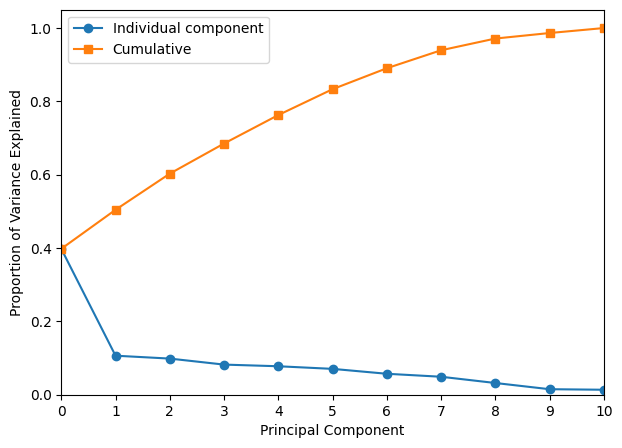

In [147]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(pca_X.explained_variance_ratio_, '-o', label='Individual component')
ax.plot(np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

ax.set_ylabel('Proportion of Variance Explained')
ax.set_xlabel('Principal Component')
ax.set_xlim(0.75, 4.25)
ax.set_ylim(0, 1.05)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.legend(loc='upper left')

plt.show()


In [148]:
pca = PCA().fit(X)
print(pca_X.explained_variance_ratio_)
sum(pca.explained_variance_ratio_[:3])

[0.3979193  0.10643227 0.09855181 0.08216101 0.07763696 0.07050862
 0.05715895 0.04902216 0.03197913 0.01505815 0.01357164]


0.6029033851452662

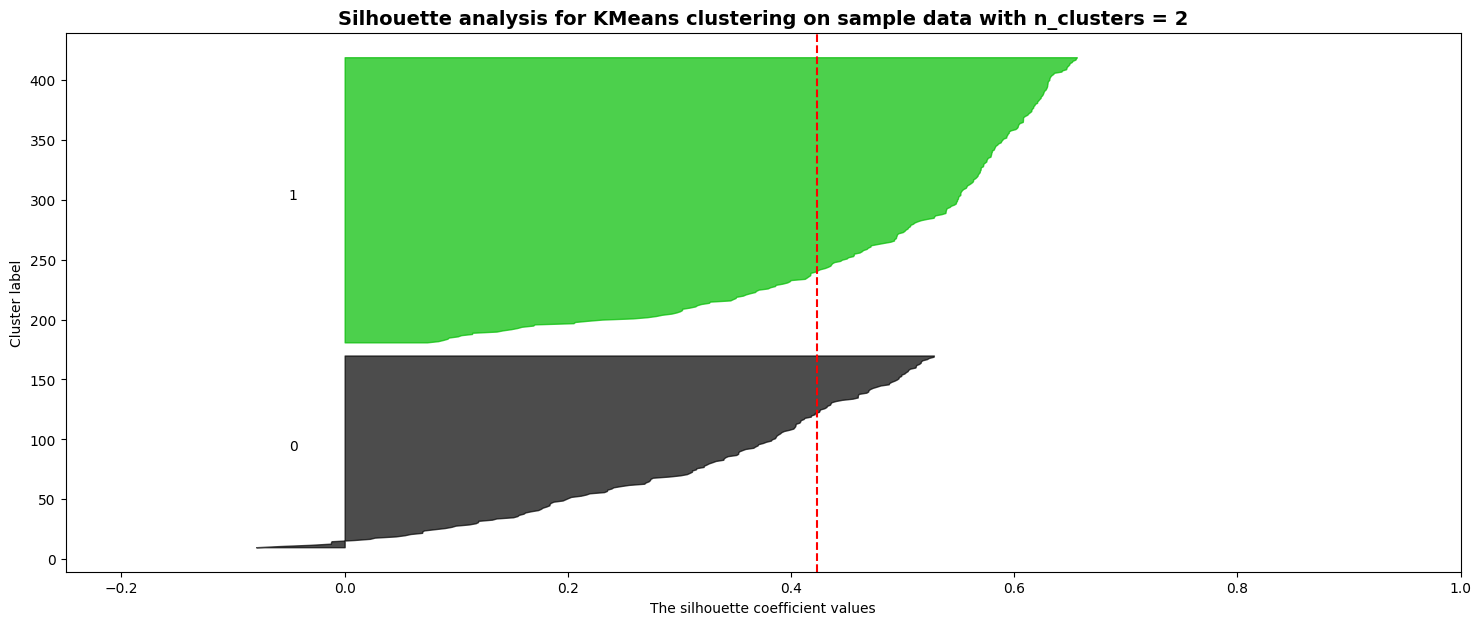

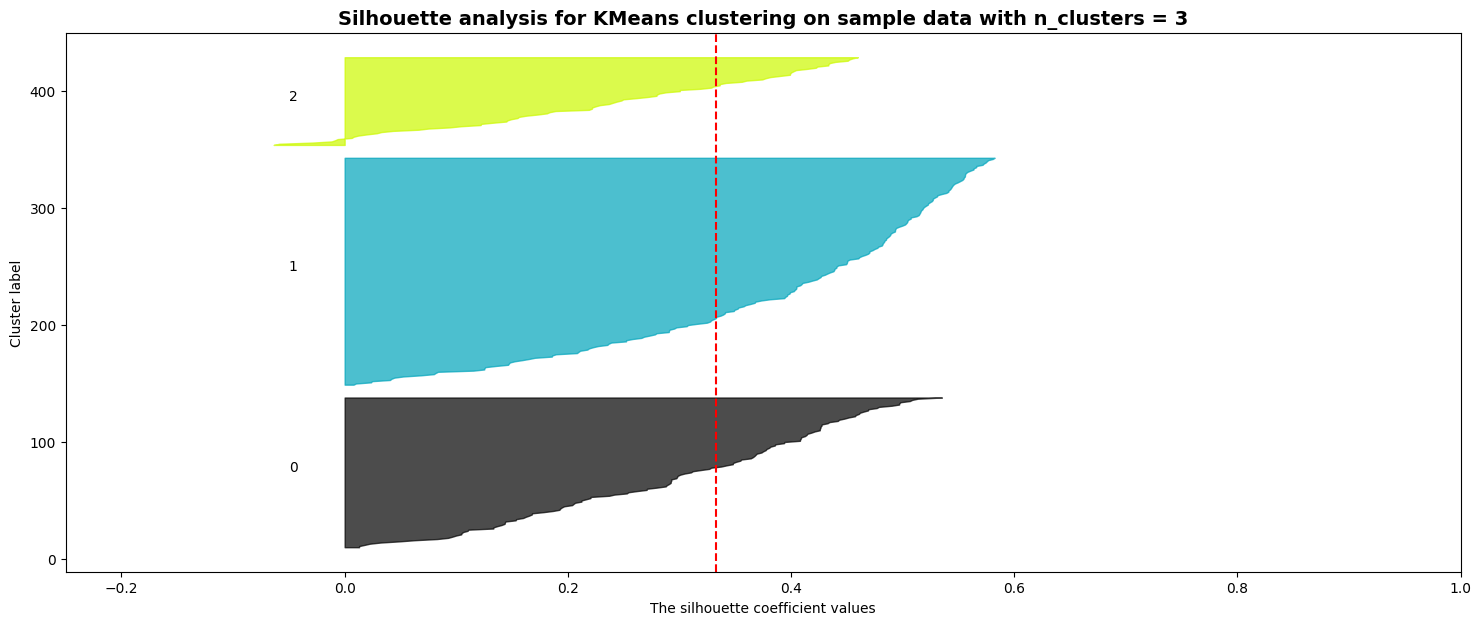

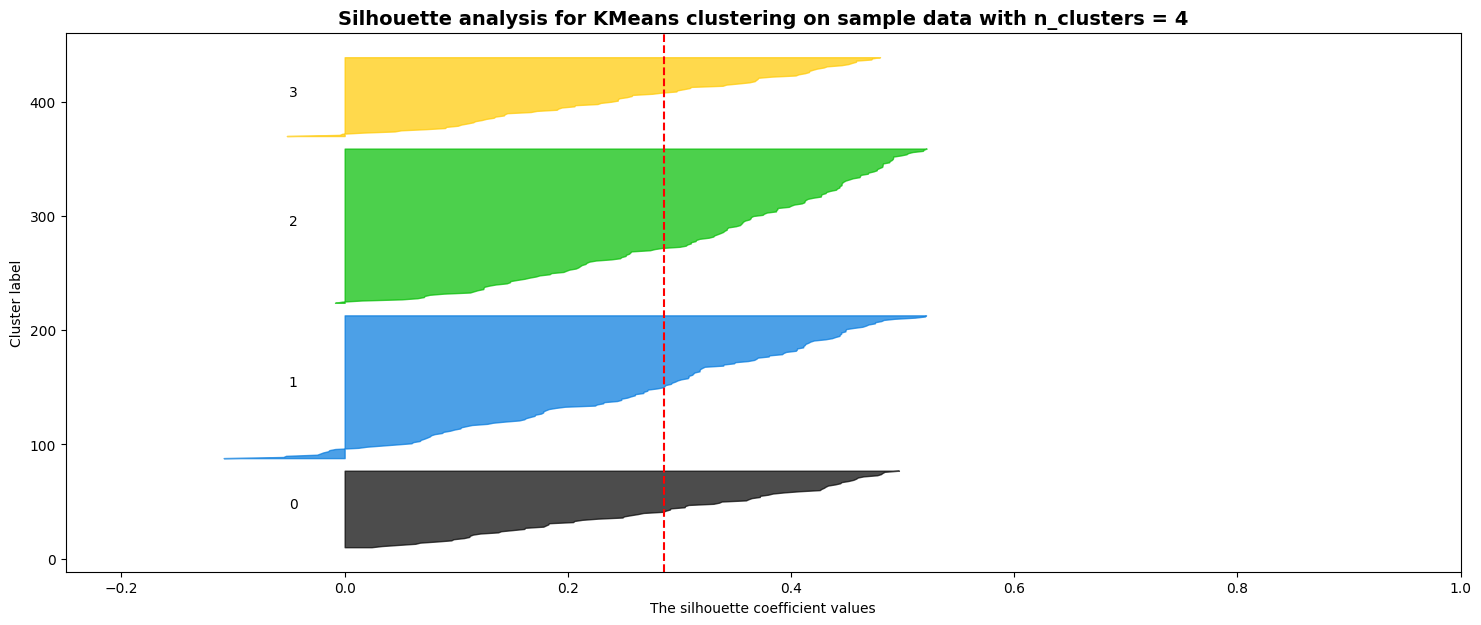

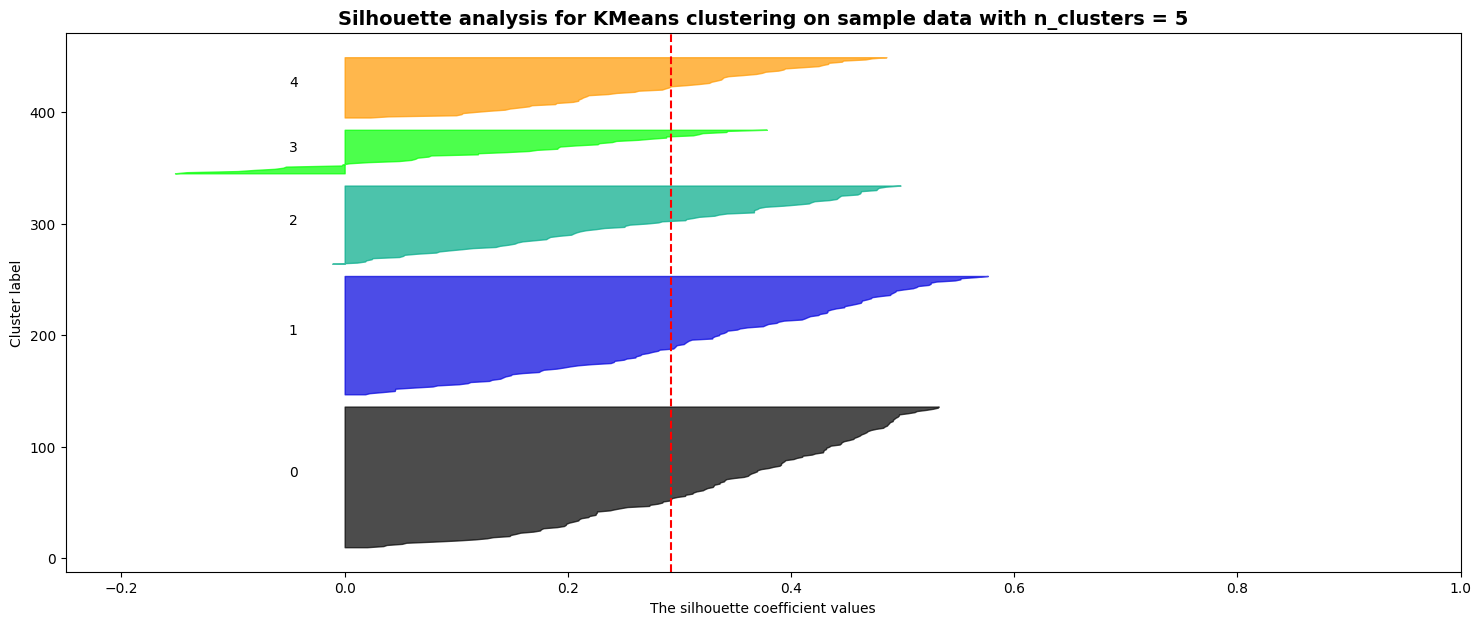

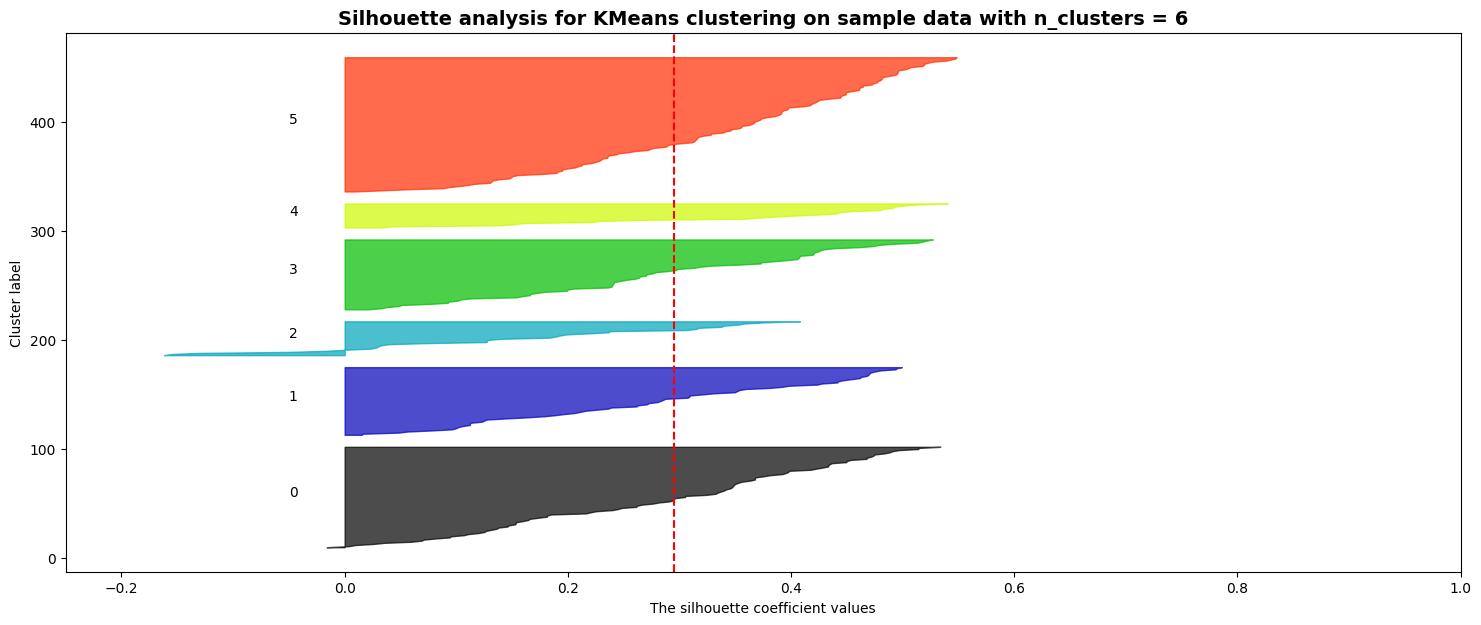

In [149]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_test)

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=1)
    cluster_labels_km = km.fit_predict(df_pca)
    silhouette_avg_km = silhouette_score(df_pca, cluster_labels_km)
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels_km)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.show()


After applying PCA, K-means clustering shows promising results with optimal performance achieved when the number of clusters (K) is set to 2. To further explore the data and visualize cluster structures, we'll utilize hierarchical clustering. This technique arranges data points into a hierarchical tree-like structure, known as a dendrogram, based on their similarity. This approach offers a comprehensive visual representation of the data's clustering patterns, allowing for deeper insights into the underlying structures within the dataset.

In [150]:
pd.DataFrame(df_pca)

,0,1,2
0,-1.349650,0.183226,0.243718
1,-1.411052,1.130044,-2.195523
2,1.419362,-0.610541,0.774332
3,1.692272,-0.423708,-2.965504
4,-0.098061,0.326140,-0.244966
...,...,...,...
395,-1.859395,0.604985,1.861730
396,-3.305272,-0.054089,-0.749107
397,-2.521051,1.243648,-1.071353
398,-2.257026,1.427142,-1.026608


In [151]:
df['class']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: category
Categories (2, float64): [0.0, 1.0]

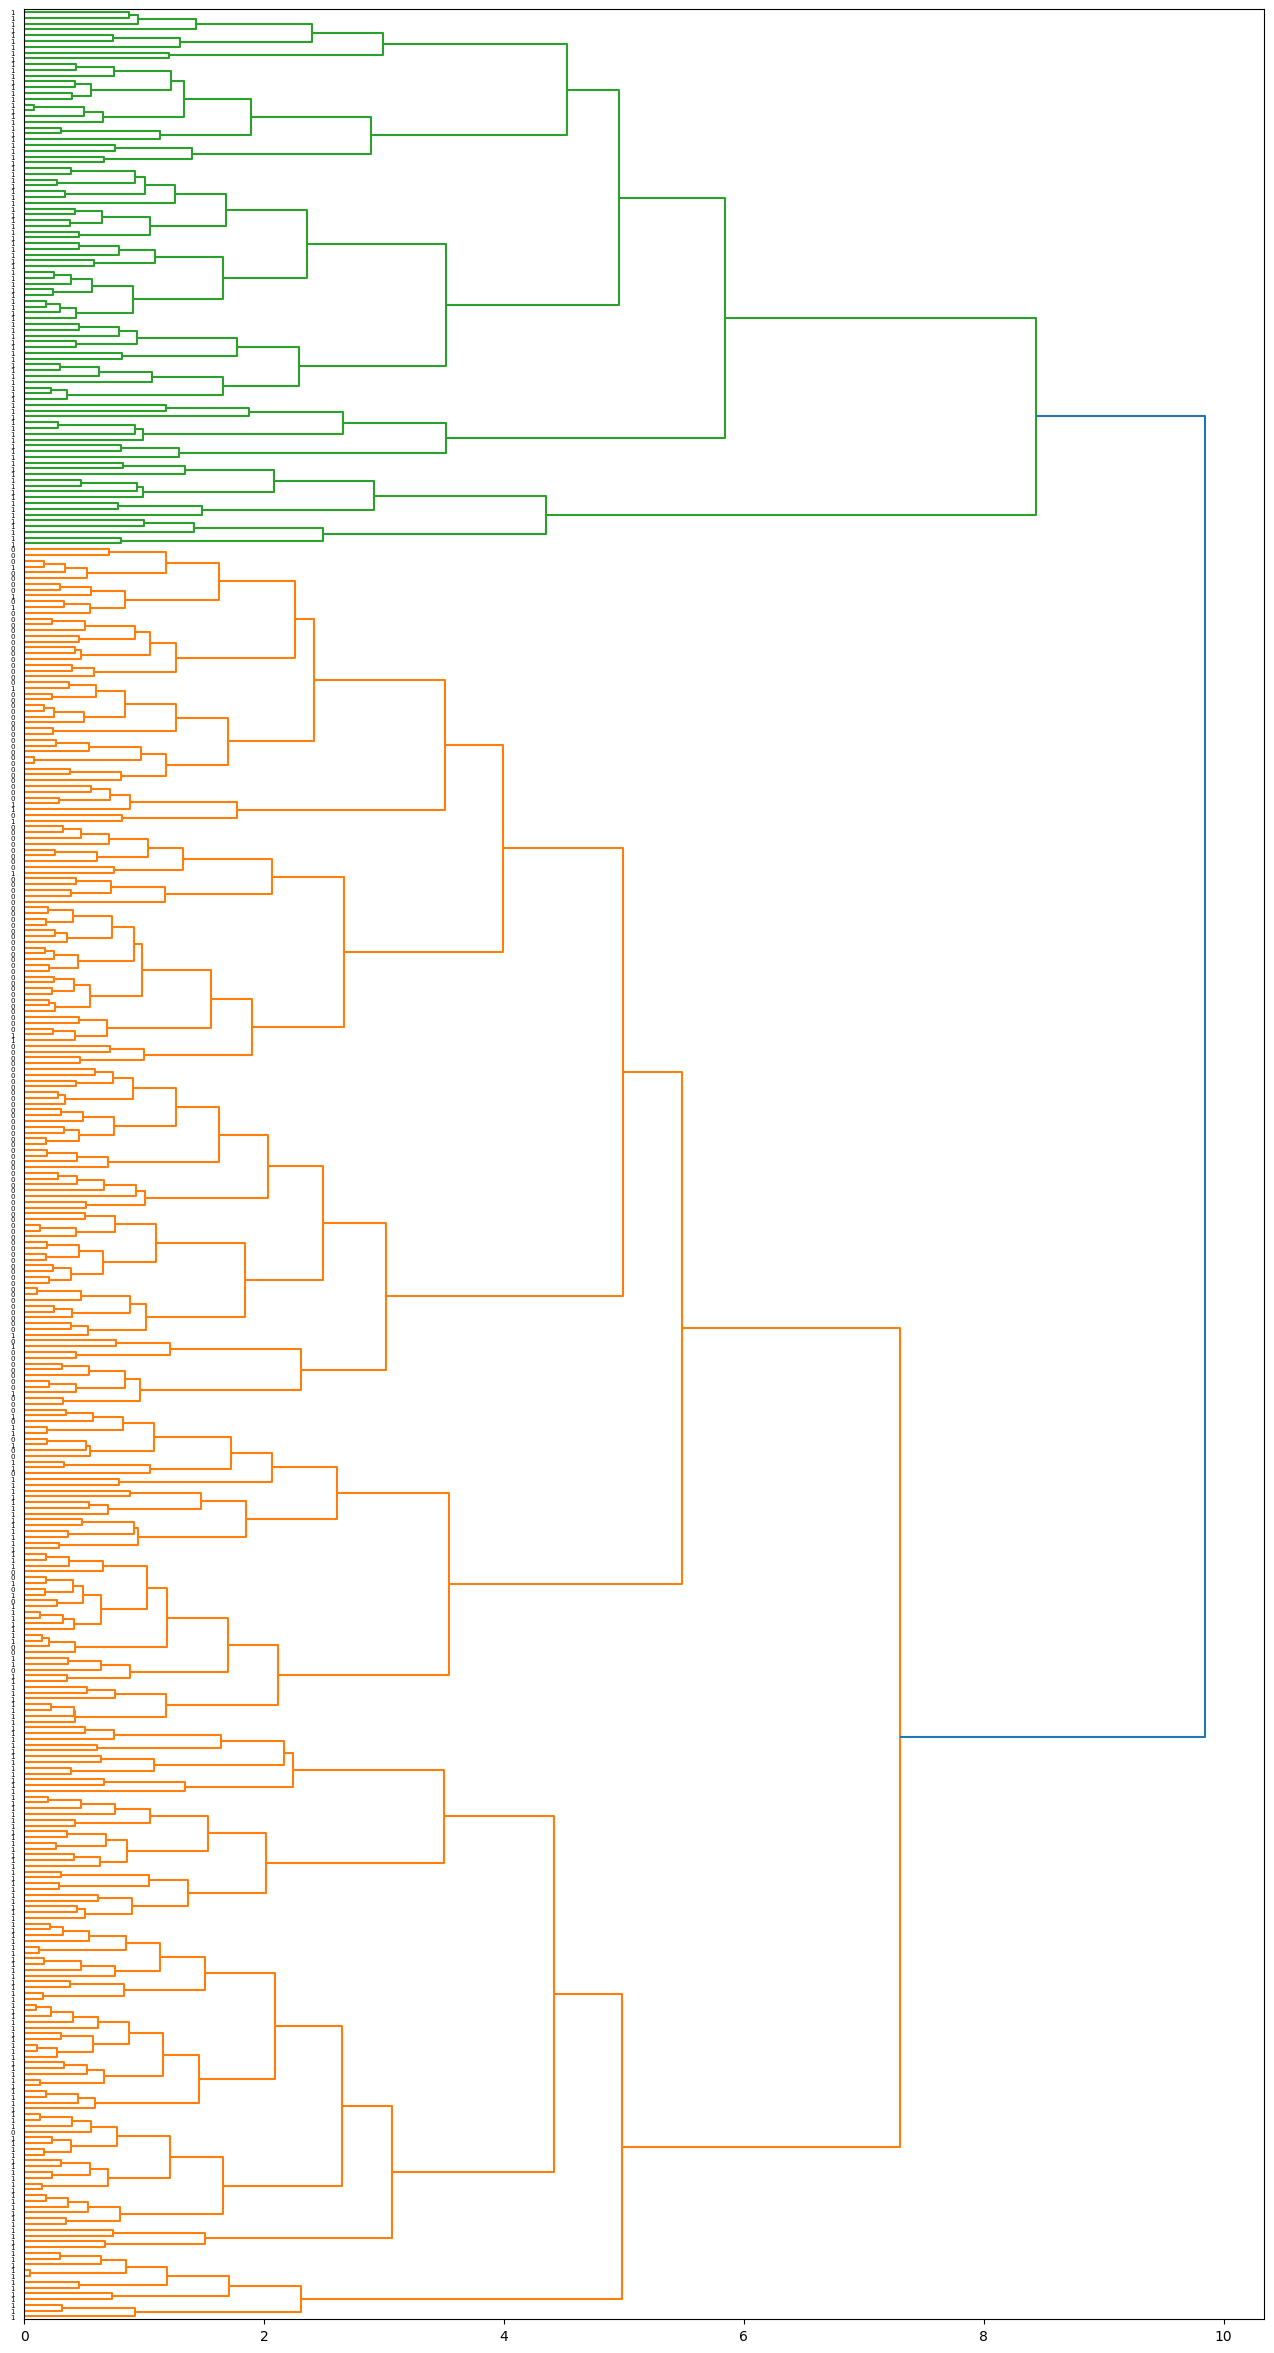

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy

# Create a new figure and axis with a specified size
fig, ax = plt.subplots(figsize=(16, 30))

# Generate the dendrogram plot using hierarchical clustering
pca_cluster = hierarchy.dendrogram(
    hierarchy.complete(df_pca),  # Perform complete linkage hierarchical clustering on the PCA-transformed data
    labels=df['class'].astype(int).astype(str).tolist(),  # Set labels for the leaves of the dendrogram
    orientation='right',  # Display the dendrogram horizontally
    color_threshold=9,  # Set the color threshold to determine clusters
    ax=ax  # Assign the axis object to plot the dendrogram
)

# Display the plot
plt.show()


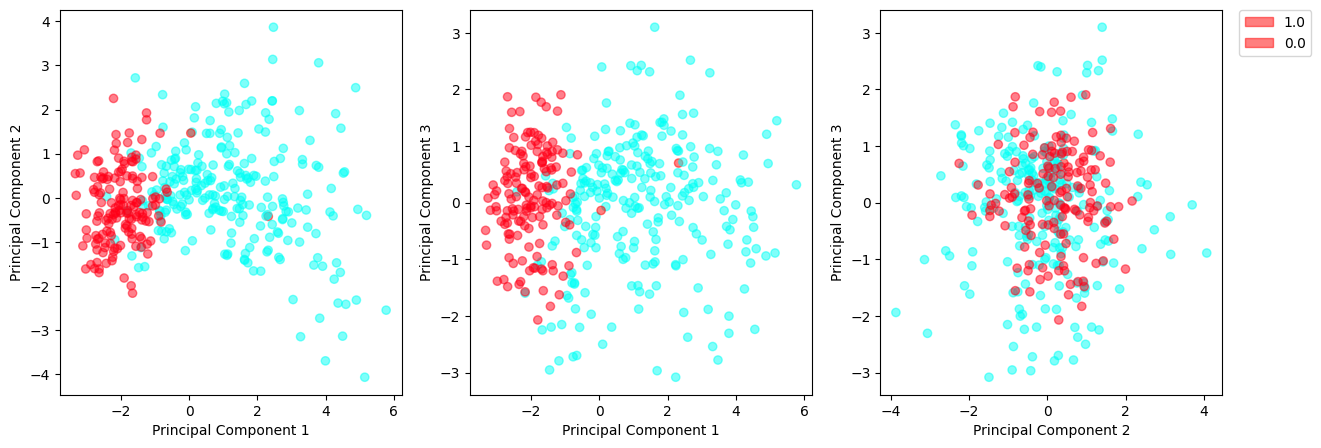

In [153]:


df2_plot = pd.DataFrame(pca_X.fit_transform(X))

y_ts = y["class"].map({'ckd': 1, 'notckd': 0})


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl


df_pca_with_target = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca_with_target['Target'] = y_ts

color_idx = pd.factorize(df_pca_with_target['Target'])[0]
cmap = plt.cm.hsv


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# PC1 vs PC2
axes[0].scatter(df2_plot.iloc[:,0], -df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axes[1].scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axes[2].scatter(df2_plot.iloc[:,1], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5)
axes[2].set_xlabel('Principal Component 2')
axes[2].set_ylabel('Principal Component 3')



handles = []
labels = pd.factorize(y_ts.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

axes[2].legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [154]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

# K = 2
km1 = KMeans(n_clusters=2, n_init=20, random_state=1)
km1.fit(df_pca)

# Status variable saved in (1)
status = df['class'].astype(int).astype(str)

rand_score(km1.labels_, status).round(4)

print('Rand score is ' + str(rand_score(km1.labels_, status).round(4)))



Rand score is 0.6531


Using PCA as a preprocessing step, the K-means algorithm demonstrates strong performance as evidenced by the Rand score. This score indicates that the clustering results align well with the ground truth labels or known groupings in the dataset. In other words, K-means effectively identifies clusters that closely match the true clusters in the data, suggesting its efficacy in capturing meaningful patterns and structures within the dataset.

### **8. Data Splitting**

In [155]:
from sklearn.model_selection import train_test_split
df_feature = df.drop(columns =['class'])
df_target = df['class']

In [156]:
# 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.3, random_state=1)

### 9 . **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

Given that the dataset involves binary classification, logistic regression emerges as a suitable choice due to its effectiveness in handling such problems. Logistic regression is renowned for its ability to model binary outcomes and has demonstrated success in various classification tasks.

Additionally, random forest stands out as a robust option for classification tasks. Its ensemble learning approach, combining multiple decision trees, often leads to reliable predictions and generalization capabilities. Random forest's popularity and consistent performance across different domains make it a compelling choice for our classifier selection alongside logistic regression.

### 10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

In [157]:
from sklearn.linear_model import LogisticRegression
def_log = LogisticRegression(max_iter = 500)
def_log.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [158]:
pred_prob = def_log.predict_proba(X_test)
df_pro = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
df_pro.head(5)

,prob,y_test
398,0.006797,0.0
125,0.998948,1.0
328,0.040615,0.0
339,0.033737,0.0
172,0.999941,1.0


In [159]:
df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )

In [160]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df_logit.y_test, df_logit.prob0)


In [161]:
# AUC
roc_auc_score(df_logit.y_test, df_logit.prob0)

0.9954285714285713

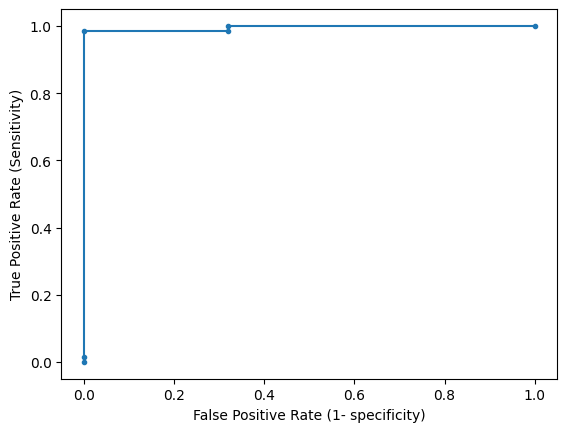

In [162]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(fpr, tpr, marker='.', label='Logistic')

# Set labels for x and y axes
ax.set_xlabel('False Positive Rate (1- specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity)')

# Display the plot
plt.show()


In [163]:
# ROC
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
optimal_threshold

0.28787310322751003

In [164]:
ind = np.where(np.isclose(thresholds, optimal_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[1.]


In [165]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.28787310322751003

In [166]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[1.]


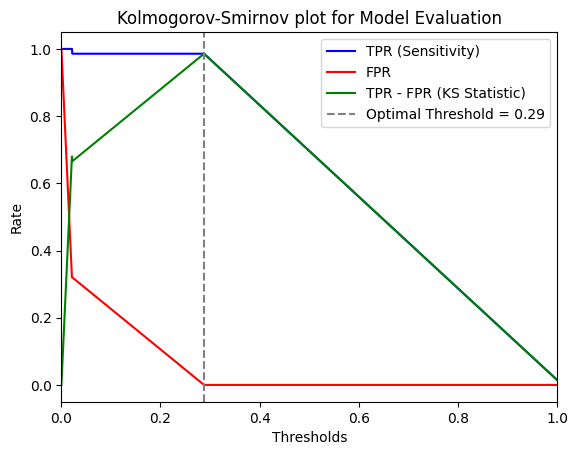

In [167]:

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot TPR (Sensitivity)
ax.plot(thresholds, tpr, label='TPR (Sensitivity)', color='blue')

# Plot FPR
ax.plot(thresholds, fpr, label='FPR', color='red')

# Plot TPR - FPR (KS Statistic)
ax.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')

# Add vertical line for optimal threshold
ax.axvline(x=ks_threshold, color='grey', linestyle='--', label=f'Optimal Threshold = {ks_threshold:.2f}')

# Set title and labels for x and y axes
ax.set_title('Kolmogorov-Smirnov plot for Model Evaluation')
ax.set_xlabel('Thresholds')
ax.set_ylabel('Rate')

# Set limits for x-axis
ax.set_xlim([0.0, 1.0])

# Add legend
ax.legend()

# Display the plot
plt.show()

In [168]:
from patsy import dmatrices, dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [169]:
# Create a data frame with predicted probabilities (for default) and the class labels in the test set.
df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )

# Use cutoff = 0.287 and compute misclassification error, sensitivity, and specificity.
df_logit['y_test_pred'] = df_logit.prob0.map(lambda x: 1 if x>ks_threshold else 0)



In [170]:
cm = confusion_matrix(df_logit.y_test, df_logit.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 2 68]]
Accuracy :  0.9833333333333333


In [171]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity )

Sensitivity :  0.9714285714285714
Specificity :  1.0


### 11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

In [172]:
from sklearn.linear_model import ElasticNetCV,ElasticNet
from sklearn.metrics import mean_squared_error
enet_cv = ElasticNetCV(cv=10, random_state=1)
enet_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, random_state=1)

In [173]:
#test MSE associated with this value of $\lambda$ and $l1_ratio$
m_enet =ElasticNet(alpha=enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)
m_enet.fit(X_train, y_train) 
m_enet_pre = m_enet.predict(X_test)
np.sqrt(mean_squared_error(y_test, m_enet_pre))

0.2858361665891256

In [174]:
pd.DataFrame({'Feature': X_train.columns, 'Coefficient': m_enet.coef_.reshape(len(X_train.columns))})

,Feature,Coefficient
0,age,0.010934
1,bp,0.026887
2,sg,-0.000000
3,al,0.054397
4,su,0.005206
5,rbc,0.000000
6,pc,0.000000
7,pcc,0.000000
8,ba,-0.000000
9,bgr,0.034062


Here we can know  [`age`, `bp`, `al`, `su`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wbcc`, `rbcc`, `htn`, `dm`, `cad`, `appet`, `ane`] are important features.

In [175]:
sel_col = ['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'ane']
X_train_elastic_net = X_train[sel_col]

In [176]:
from sklearn import metrics
X_test_elastic_net = X_test[sel_col]
EN_log = LogisticRegression(max_iter = 500)
EN_log.fit(X_train_elastic_net, y_train)
EN_test = EN_log.predict(X_test_elastic_net)
np.sqrt(metrics.mean_squared_error(y_test, EN_test))

0.18257418583505536

In [177]:
# use feature selection to do logistic again 
EN_log = LogisticRegression(max_iter = 500)
EN_log.fit(X_train_elastic_net, y_train)
pred_prob = EN_log.predict_proba(X_test_elastic_net)
df_pro = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
EN_df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )
fpr, tpr, thresholds = roc_curve(EN_df_logit.y_test, EN_df_logit.prob0)

In [178]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.30522025358268723

In [179]:
# Use cutoff = 0.3052 and compute misclassification error, sensitivity, and specificity.
EN_df_logit['y_test_pred'] = EN_df_logit.prob0.map(lambda x: 1 if x>0.3052 else 0)

In [180]:
cm = confusion_matrix(EN_df_logit.y_test, EN_df_logit.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 1 69]]
Accuracy :  0.9916666666666667


Elastic net successfully achieves shrinkage through feature selection and extraction while maintaining accuracy unchanged.
- Let's try Sequential Forward Selection for logistic regression

In [181]:
from sklearn import metrics
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [182]:
def_log = LogisticRegression(max_iter = 500)
def_log.fit(X_train, y_train)
d_l_test = def_log.predict(X_test)

In [183]:
np.sqrt(metrics.mean_squared_error(y_test, d_l_test))

0.18257418583505536

In [184]:
df_feature.shape

(400, 24)

In [185]:
sfs = SFS(
    def_log,
    k_features=(1,df_feature.shape[1]),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=10
    )

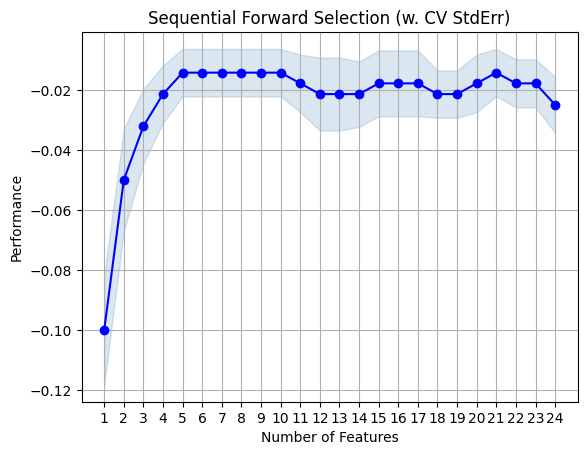

In [186]:
sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

In [187]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['al', 'su', 'sc', 'pot', 'hemo'], dtype='object')

By feature selection, ['al', 'su', 'sc', 'pot', 'hemo'] are chosen

In [188]:
# Prediction on hold-out set
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
sfs_log = LogisticRegression(max_iter = 500)
sfs_log.fit(X_train_sfs, y_train)
sfs_test = sfs_log.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_test))

0.2041241452319315

In [189]:
# use feature selection to do logistic again 
sfs_log = LogisticRegression(max_iter = 500)
sfs_log.fit(X_train_sfs, y_train)
pred_prob = sfs_log.predict_proba(X_test_sfs)
df_pro = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
sfs_df_logit = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )
fpr, tpr, thresholds = roc_curve(sfs_df_logit.y_test, sfs_df_logit.prob0)

In [190]:
# AUC
roc_auc_score(sfs_df_logit.y_test, sfs_df_logit.prob0)

0.9925714285714284

In [191]:
# Use cutoff = 0.287 and compute misclassification error, sensitivity, and specificity.
sfs_df_logit['y_test_pred'] = sfs_df_logit.prob0.map(lambda x: 1 if x>ks_threshold else 0)

In [192]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.42283003219424864

In [193]:
cm = confusion_matrix(sfs_df_logit.y_test, sfs_df_logit.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[48  2]
 [ 2 68]]
Accuracy :  0.9666666666666667


It's evident that the final performance of logistic-based sequential forward selection is not as good as Elastic Net. Therefore, we will adopt the results of Elastic Net.

sel_col = [`age`, `bp`, `al`, `su`, `bgr`, `bu`, `sc`, `sod`, `pot`, `hemo`, `pcv`, `wbcc`, `rbcc`, `htn`, `dm`, `cad`, `appet`, `ane`]

### 12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)


{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(min_samples_split=10)


In [195]:
rf = RandomForestClassifier(max_depth=None, min_samples_split=5,n_estimators=50)

In [196]:
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)

In [197]:
pred_prob = rf.predict_proba(X_test)
df_rf = pd.DataFrame(data = {'prob0': pred_prob[:,1], 'y_test': y_test})

In [198]:
fpr, tpr, thresholds = roc_curve(df_rf.y_test, df_rf.prob0)

In [199]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.4723333333333333

In [200]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[1.]
[1.]


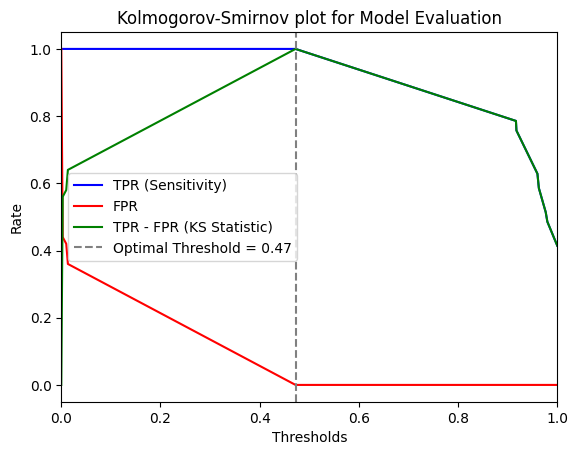

In [201]:
plt.plot(thresholds, tpr, label='TPR (Sensitivity)', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')
plt.axvline(x=ks_threshold, color='grey', linestyle='--', label=f'Optimal Threshold = {ks_threshold:.2f}')
plt.title('Kolmogorov-Smirnov plot for Model Evaluation')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.xlim([0.0, 1.0])
plt.show()

In [202]:
# Use cutoff = 0.55 and compute misclassification error, sensitivity, and specificity.
df_rf['y_test_pred'] = df_rf.prob0.map(lambda x: 1 if x>0.55 else 0)

In [203]:
cm = confusion_matrix(df_rf.y_test, df_rf.y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 1 69]]
Accuracy :  0.9916666666666667


In [204]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy:', accuracy_score(y_test, y_test_pred))

Accuracy: 0.9916666666666667


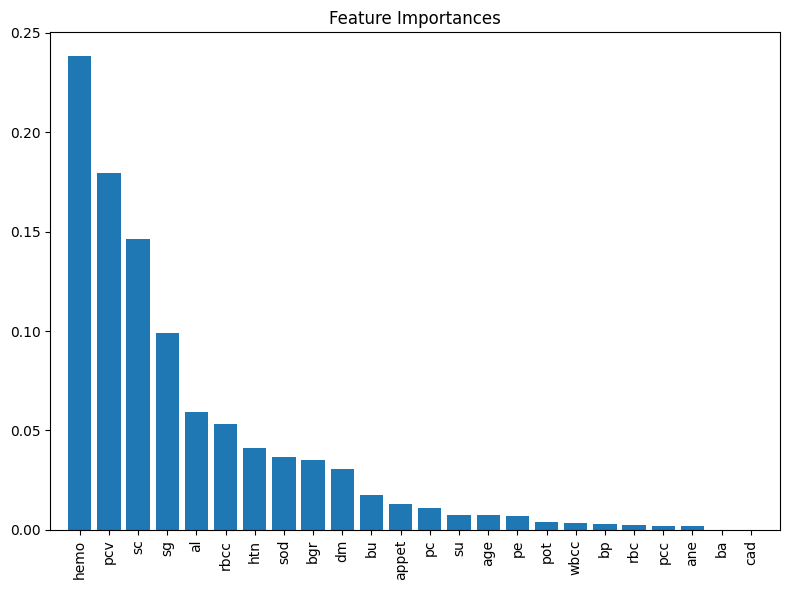

In [205]:
importances = best_rf.feature_importances_

feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

By interpreting with random forest, the accuracy of the model is 1.0, which is extremely high. 

if we choose features from 11.

In [206]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_elastic_net, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test_elastic_net)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(max_depth=10, n_estimators=50)


In [207]:
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix : \n', cm)

total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[50  0]
 [ 2 68]]
Accuracy :  0.9833333333333333


In [208]:
rf = RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=50)
rf.fit(X_train_elastic_net,y_train)
pred_prob = rf.predict_proba(X_test_elastic_net)
df_rf = pd.DataFrame(data = {'prob0': pred_prob[:,1], 'y_test': y_test})

In [209]:
fpr, tpr, thresholds = roc_curve(df_rf.y_test, df_rf.prob0)

In [210]:
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.5028571428571429

In [211]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])

[0.98571429]
[0.98]


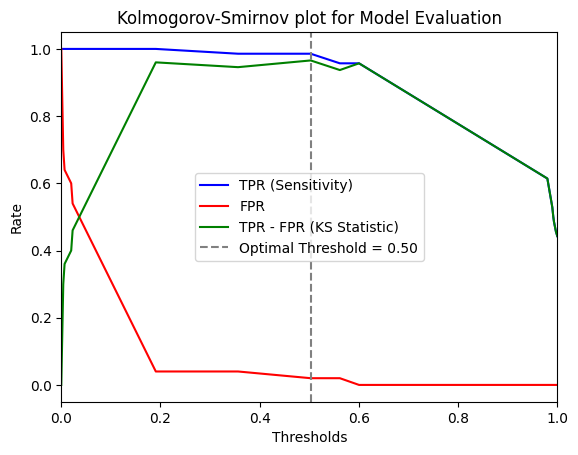

In [212]:
plt.plot(thresholds, tpr, label='TPR (Sensitivity)', color='blue')
plt.plot(thresholds, fpr, label='FPR', color='red')
plt.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')
plt.axvline(x=ks_threshold, color='grey', linestyle='--', label=f'Optimal Threshold = {ks_threshold:.2f}')
plt.title('Kolmogorov-Smirnov plot for Model Evaluation')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.xlim([0.0, 1.0])
plt.show()

In [213]:
# Use cutoff = 0.393 and compute misclassification error, sensitivity, and specificity.
df_rf['y_test_pred'] = df_rf.prob0.map(lambda x: 1 if x>0.393 else 0)

Based on ROC-derived optimal thresholds and testing the prediction results of logistic regression and random forest, we found that after elastic net feature selection, logistic regression achieved a superior accuracy of 99.167%.\
Confusion Matrix:\
[49 0]\
[1 69]

The random forest model, utilizing the full feature set, also delivered a similar accuracy with an identical confusion matrix.\
Confusion Matrix:\
[49 0]\
[1 69]

This parallel in performance suggests that both models are performing exceptionally well. However, in keeping with the principle of Occam's razor, the logistic regression model, which maintains high accuracy with a reduced feature set post elastic net regularization, is deemed more efficient and is therefore the preferable model.

### 13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

In [214]:
# features from elastic net
sel_col = ['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'ane']

The variables al and su exhibit notably large coefficients in the logistic regression model. However, their high p-values, close to 1, suggest that these coefficient estimates may not be reliable due to potential fitting issues. It implies that these variables may not have a significant impact on the classification outcome when considering other variables.

Conversely, the variable sc demonstrates a positive coefficient with a very small p-value, indicating a significant effect on the classification outcome even after accounting for other variables. This suggests that serum creatinine level could be a crucial predictor in identifying kidney disease, potentially displaying a strong correlation with the classification outcome.

Similarly, the variable hemo shows a negative coefficient with a small p-value, implying a significant influence on the classification outcome while controlling for other variables. This suggests that hemoglobin level could also serve as an important predictor, displaying a notable negative correlation with the classification of kidney disease.

### 14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

In [215]:
pca = PCA(n_components = 3)
# K = 2
km1 = KMeans(n_clusters=2, n_init=20, random_state=1)
km1.fit(df_pca)

KMeans(n_clusters=2, n_init=20, random_state=1)

In [216]:
# add K=2 cluster labels to df
df['cluster'] = km1.labels_

# seperate cluster
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]

In [217]:
from sklearn.ensemble import RandomForestClassifier

# rf train each cluster
rf_cluster_0 = RandomForestClassifier()
rf_cluster_1 = RandomForestClassifier()

# split
X_cluster_0 = cluster_0.drop(['class', 'cluster'], axis=1)
y_cluster_0 = cluster_0['class']
X_cluster_1 = cluster_1.drop(['class', 'cluster'], axis=1)
y_cluster_1 = cluster_1['class']

# train model
rf_cluster_0.fit(X_cluster_0, y_cluster_0)
rf_cluster_1.fit(X_cluster_1, y_cluster_1)


RandomForestClassifier()

In [218]:
from sklearn.metrics import accuracy_score

# calculate accuracy
y_test_pred_cluster_0 = rf_cluster_0.predict(X_test)
accuracy_cluster_0 = accuracy_score(y_test, y_test_pred_cluster_0)

y_test_pred_cluster_1 = rf_cluster_1.predict(X_test)
accuracy_cluster_1 = accuracy_score(y_test, y_test_pred_cluster_1)

print("Accuracy for Cluster 0:", accuracy_cluster_0)
print("Accuracy for Cluster 1:", accuracy_cluster_1)


Accuracy for Cluster 0: 0.5833333333333334
Accuracy for Cluster 1: 1.0


In [219]:
cluster_1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,cluster
0,-0.217955,0.381013,1.020,1.0,0.0,1.0,1.0,0.0,0.0,-0.282640,...,-0.181983,0.638364,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
1,-2.548388,-1.900504,1.020,4.0,0.0,1.0,1.0,0.0,0.0,-0.282640,...,-1.069478,0.044882,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,-0.038691,0.381013,1.010,2.0,0.0,1.0,1.0,0.0,0.0,-0.608480,...,-0.428509,-0.251859,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
5,0.499101,1.293621,1.015,3.0,0.0,1.0,1.0,0.0,0.0,-1.303607,...,-0.181983,-0.548600,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1
7,-1.652068,0.381013,1.015,2.0,4.0,1.0,0.0,0.0,0.0,1.943938,...,-0.625730,0.341623,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.200328,0.381013,1.020,0.0,0.0,1.0,1.0,0.0,0.0,0.130092,...,-0.724341,0.193253,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
396,-0.576483,-0.531594,1.025,0.0,0.0,1.0,1.0,0.0,0.0,-1.281884,...,-0.181983,1.825329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
397,-2.369124,0.381013,1.020,0.0,0.0,1.0,1.0,0.0,0.0,-0.738816,...,-0.773646,0.935106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
398,-2.070350,-1.444201,1.025,0.0,0.0,1.0,1.0,0.0,0.0,-0.434699,...,-0.477814,1.676958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


We found that after performing PCA on the dataset and conducting subgroup analysis using K-means with K=2, cluster 01 exhibited excellent performance in random forest, achieving a prediction accuracy of 100%. This suggests that PCA and clustering techniques may improve the performance of one classifier.

### 15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

### 16. **Link** to the public GitHub repository.

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
